# Cleaning and Feature Engineering

In [1704]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import plotly.express as px
import seaborn as sns
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import warnings
warnings.filterwarnings('ignore')
import copy

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [1705]:
def get_unique_values(df):
    for i in df.columns:
        print(i,set(np.unique(df[i])),'\n')
        
def type_(x):
    if len(x) == 0:
        t = 'Numerical'
    elif len(x) == 2:
        t = 'Binary Categorical'
    else:
        t = 'Categorical' 
    return t


################################################################# Data Dictionary For Housing Data


housing_dict = pd.read_csv('./data/data_description.txt',
                   sep="\n|:",
                   header=None,
                   engine='python')

housing_dict.columns = ['var','descr']

new_housing_dict = housing_dict.loc[~housing_dict['descr'].isnull()]

new_housing_dict.loc[0:,'index_'] = new_housing_dict.index

idx = new_housing_dict['index_'].to_numpy()
i = 0
indx_outcomes = []
while (i < len(idx)-1):
    indx_outcomes.append(np.arange(idx[i]+1,idx[i+1]))
    i += 1

associated_outcomes = []
for j in indx_outcomes:
    associated_outcomes.append(housing_dict[['var']].loc[j].to_numpy())
    
associated_outcomes.append(np.array([])) #append an empty array to fix length issue

associated_outcomes = pd.Series(associated_outcomes).\
                        apply(lambda outcome_set: [i[0] for i in outcome_set]).to_numpy()



new_housing_dict.loc[0:,'associated_outcomes'] = associated_outcomes
new_housing_dict = new_housing_dict.reset_index()
new_housing_dict = new_housing_dict.drop(['index','index_'], axis = 1)


types = [type_(elem) for elem in new_housing_dict['associated_outcomes']]
new_housing_dict.loc[0:,'Variable Type'] = types

housing_dict = new_housing_dict

def ghd():
    return(housing_dict.sort_values(by = "var"))

# Reading in Housing Data

In [1706]:
housing = pd.read_csv('./data/Ames_Housing_Price_Data.csv')
housing.rename(columns = {'PID':'MapRefNo'}, inplace = True) # renaming to later merge res and housing on this column
housing = housing.drop('Unnamed: 0', axis = 1)
housing.shape

(2580, 81)

In [1707]:
housing.head()

,MapRefNo,GrLivArea,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,909176150,856,126000,30,RL,NaN,7890,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,SWISU,Norm,Norm,1Fam,1Story,6,6,1939,1950,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,238.0,Unf,0.0,618.0,856.0,GasA,TA,Y,SBrkr,856,0,0,1.0,0.0,1,0,2,1,TA,4,Typ,1,Gd,Detchd,1939.0,Unf,2.0,399.0,TA,TA,Y,0,0,0,0,166,0,NaN,NaN,NaN,0,3,2010,WD,Normal
1,905476230,1049,139500,120,RL,42.0,4235,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,TwnhsE,1Story,5,5,1984,1984,Gable,CompShg,HdBoard,HdBoard,BrkFace,149.0,Gd,TA,CBlock,Gd,TA,Mn,GLQ,552.0,ALQ,393.0,104.0,1049.0,GasA,TA,Y,SBrkr,1049,0,0,1.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1984.0,Fin,1.0,266.0,TA,TA,Y,0,105,0,0,0,0,NaN,NaN,NaN,0,2,2009,WD,Normal
2,911128020,1001,124900,30,C (all),60.0,6060,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,1Story,5,9,1930,2007,Hip,CompShg,MetalSd,MetalSd,None,0.0,Gd,TA,BrkTil,TA,TA,No,ALQ,737.0,Unf,0.0,100.0,837.0,GasA,Ex,Y,SBrkr,1001,0,0,0.0,0.0,1,0,2,1,Gd,5,Typ,0,NaN,Detchd,1930.0,Unf,1.0,216.0,TA,Po,N,154,0,42,86,0,0,NaN,NaN,NaN,0,11,2007,WD,Normal
3,535377150,1039,114000,70,RL,80.0,8146,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,OldTown,Norm,Norm,1Fam,2Story,4,8,1900,2003,Gable,CompShg,MetalSd,MetalSd,None,0.0,Gd,Gd,BrkTil,Fa,TA,No,Unf,0.0,Unf,0.0,405.0,405.0,GasA,Gd,Y,SBrkr,717,322,0,0.0,0.0,1,0,2,1,TA,6,Typ,0,NaN,Detchd,1940.0,Unf,1.0,281.0,TA,TA,N,0,0,168,0,111,0,NaN,NaN,NaN,0,5,2009,WD,Normal
4,534177230,1665,227000,60,RL,70.0,8400,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,2Story,8,6,2001,2001,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,TA,No,GLQ,643.0,Unf,0.0,167.0,810.0,GasA,Ex,Y,SBrkr,810,855,0,1.0,0.0,2,1,3,1,Gd,6,Typ,0,NaN,Attchd,2001.0,Fin,2.0,528.0,TA,TA,Y,0,45,0,0,0,0,NaN,NaN,NaN,0,11,2009,WD,Normal


# Reading in Real Estate Data

In [1708]:
res = pd.read_csv('./data/Ames_Real_Estate_Data.csv')
res.shape

dd_res = pd.read_excel('./data/Tbl_DataExportSpec.xls')
dd_res.shape

(100, 7)

## **Note: res columns (36,40,81,87) have mixed data types**

# Dealing with Nulls

In [1834]:
data = housing.copy()

nan_counts = pd.DataFrame(data.isnull().sum()).T
nan_counts

,MapRefNo,GrLivArea,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,0,0,0,0,0,462,0,0,2412,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,14,14,0,0,0,69,69,71,69,1,70,1,1,1,0,0,0,1,0,0,0,2,2,0,0,0,0,0,0,0,0,1241,127,129,129,1,1,129,129,0,0,0,0,0,0,0,2571,2055,2483,0,0,0,0,0


In [1835]:
high_null_cols = ["Alley", "FireplaceQu", "PoolQC",
                  "Fence", "MiscFeature"] # columns with too many nulls

data = data.drop(high_null_cols,axis = 1)


nan_counts = pd.DataFrame(data.isnull().sum()).T
nan_counts = nan_counts.iloc[:,[i for i,j in enumerate(nan_counts.loc[0].to_list()) if j != 0]]

nan_counts

,LotFrontage,MasVnrType,MasVnrArea,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Electrical,BsmtFullBath,BsmtHalfBath,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond
0,462,14,14,69,69,71,69,1,70,1,1,1,1,2,2,127,129,129,1,1,129,129


In [1836]:
data = data.drop('LotFrontage',axis = 1)

### Rows in train and test sets that could contain a null

In [1837]:
len(data.loc[data.isna().any(axis = 1)]),len(data)

(204, 2580)

### Not that many rows contain nulls is either set so we'll just drop them for simplicity 

In [1838]:
data_nulls = data.loc[data.isna().any(axis = 1)]
print(data_nulls.index)
data = data.drop(data_nulls.index,axis = 0)
data.loc[data.isna().any(axis = 1)]

Int64Index([   5,   17,   22,   44,   48,   50,   54,   60,   93,   96,
            ...
            2464, 2465, 2477, 2481, 2488, 2513, 2536, 2540, 2546, 2576],
           dtype='int64', length=204)


,MapRefNo,GrLivArea,SalePrice,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition


# Categoricals

In [1839]:
dc = ghd()
dc.loc[dc['Variable Type'] != 'Numerical'].iloc[3,0]

dc.loc[dc['Variable Type'] != 'Numerical'].iloc[3,1]

dc.loc[dc['Variable Type'] != 'Numerical'].iloc[3,2]

[s[0:s.find(' ')] for s in dc.loc[dc['Variable Type'] != 'Numerical'].iloc[3,2]]

im = dict(zip([s[0:s.find(' ')] for s in dc.loc[dc['Variable Type'] != 'Numerical'].iloc[3,2]],[4,3,2,1,0]))
print(set(data.loc[:,'BsmtExposure']))
print(im)
data.loc[:,'BsmtExposure'] = data['BsmtExposure'].apply(lambda x:im[x])
print(set(data.loc[:,'BsmtExposure']))

data.loc[:,'BsmtExposure'].value_counts().to_dict()

{'Mn', 'Av', 'Gd', 'No'}
{'Gd': 4, 'Av': 3, 'Mn': 2, 'No': 1, 'NA': 0}
{1, 2, 3, 4}


{1: 1603, 3: 329, 4: 236, 2: 208}

In [1840]:
dc.loc[dc['Variable Type'] != 'Numerical'].iloc[2,0]

dc.loc[dc['Variable Type'] != 'Numerical'].iloc[2,1]

dc.loc[dc['Variable Type'] != 'Numerical'].iloc[2,2]

im = {'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5}
print(set(data.loc[:,'BsmtCond']))
data.loc[:,'BsmtCond'] = data['BsmtCond'].apply(lambda x:im[x])
print(im)
print(set(data.loc[:,'BsmtCond']))

{'Fa', 'Ex', 'Gd', 'TA'}
{'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5}
{2, 3, 4, 5}


In [1841]:
dc.loc[dc['Variable Type'] != 'Numerical'].iloc[4,0]

dc.loc[dc['Variable Type'] != 'Numerical'].iloc[4,1]

dc.loc[dc['Variable Type'] != 'Numerical'].iloc[4,2]

im = dict(zip([s[0:s.find(' ')] for s in dc.loc[dc['Variable Type'] != 'Numerical'].iloc[4,2]],[6,5,4,3,2,1,0]))
print(set(data.loc[:,'BsmtFinType1']))
print(im)
data.loc[:,'BsmtFinType1'] = data['BsmtFinType1'].apply(lambda x:im[x])
print(set(data.loc[:,'BsmtFinType1']))

{'BLQ', 'ALQ', 'GLQ', 'Rec', 'Unf', 'LwQ'}
{'GLQ': 6, 'ALQ': 5, 'BLQ': 4, 'Rec': 3, 'LwQ': 2, 'Unf': 1, 'NA': 0}
{1, 2, 3, 4, 5, 6}


In [1842]:
dc.loc[dc['Variable Type'] != 'Numerical'].iloc[5,0]

dc.loc[dc['Variable Type'] != 'Numerical'].iloc[5,1]

dc.loc[dc['Variable Type'] != 'Numerical'].iloc[5,2]

im = dict(zip([s[0:s.find(' ')] for s in dc.loc[dc['Variable Type'] != 'Numerical'].iloc[5,2]],[6,5,4,3,2,1,0]))
print(set(data.loc[:,'BsmtFinType2']))
print(im)
data.loc[:,'BsmtFinType2'] = data['BsmtFinType2'].apply(lambda x:im[x])
print(set(data.loc[:,'BsmtFinType2']))

{'BLQ', 'ALQ', 'GLQ', 'Rec', 'Unf', 'LwQ'}
{'GLQ': 6, 'ALQ': 5, 'BLQ': 4, 'Rec': 3, 'LwQ': 2, 'Unf': 1, 'NA': 0}
{1, 2, 3, 4, 5, 6}


In [1843]:
dc.loc[dc['Variable Type'] != 'Numerical'].iloc[6,0]

dc.loc[dc['Variable Type'] != 'Numerical'].iloc[6,1]

dc.loc[dc['Variable Type'] != 'Numerical'].iloc[6,2]

im = dict(zip([s[0:s.find(' ')] for s in dc.loc[dc['Variable Type'] != 'Numerical'].iloc[6,2]],[5,4,3,2,1,0]))
print(set(data.loc[:,'BsmtQual']))
print(im)
data.loc[:,'BsmtQual'] = data['BsmtQual'].apply(lambda x:im[x])
print(set(data.loc[:,'BsmtQual']))

{'TA', 'Fa', 'Gd', 'Po', 'Ex'}
{'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'NA': 0}
{1, 2, 3, 4, 5}


In [1844]:
dc.loc[dc['Variable Type'] != 'Numerical'].iloc[7,0]

dc.loc[dc['Variable Type'] != 'Numerical'].iloc[7,1]

dc.loc[dc['Variable Type'] != 'Numerical'].iloc[7,2]

im = dict(zip([s[0:s.find(' ')] for s in dc.loc[dc['Variable Type'] != 'Numerical'].iloc[7,2]],[0,1]))
print(set(data.loc[:,'CentralAir']))
print(im)
data.loc[:,'CentralAir'] = data['CentralAir'].apply(lambda x:im[x])
print(set(data.loc[:,'CentralAir']))

{'N', 'Y'}
{'N': 0, 'Y': 1}
{0, 1}


In [1845]:
dc.loc[dc['Variable Type'] != 'Numerical'].iloc[11,0]

dc.loc[dc['Variable Type'] != 'Numerical'].iloc[11,1]

dc.loc[dc['Variable Type'] != 'Numerical'].iloc[11,2]

im = dict(zip([s[0:s.find(' ')] for s in dc.loc[dc['Variable Type'] != 'Numerical'].iloc[11,2]],[5,4,3,2,1]))
print(set(data.loc[:,'ExterCond']))
print(im)
data.loc[:,'ExterCond'] = data['ExterCond'].apply(lambda x:im[x])
print(set(data.loc[:,'ExterCond']))

{'TA', 'Fa', 'Gd', 'Po', 'Ex'}
{'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1}
{1, 2, 3, 4, 5}


In [1846]:
dc.loc[dc['Variable Type'] != 'Numerical'].iloc[12,0]

dc.loc[dc['Variable Type'] != 'Numerical'].iloc[12,1]

dc.loc[dc['Variable Type'] != 'Numerical'].iloc[12,2]

im = dict(zip([s[0:s.find(' ')] for s in dc.loc[dc['Variable Type'] != 'Numerical'].iloc[12,2]],[5,4,3,2,1]))
print(set(data.loc[:,'ExterQual']))
print(im)
data.loc[:,'ExterQual'] = data['ExterQual'].apply(lambda x:im[x])
print(set(data.loc[:,'ExterQual']))

{'Fa', 'Ex', 'Gd', 'TA'}
{'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1}
{2, 3, 4, 5}


In [1847]:
dc.loc[dc['Variable Type'] != 'Numerical'].iloc[18,0]

dc.loc[dc['Variable Type'] != 'Numerical'].iloc[18,1]

dc.loc[dc['Variable Type'] != 'Numerical'].iloc[18,2]

im = dict(zip([s[0:s.find(' ')] for s in dc.loc[dc['Variable Type'] != 'Numerical'].iloc[18,2]],[8,7,6,5,4,3,2,1]))
print(set(data.loc[:,'Functional']))
print(im)
data.loc[:,'Functional'] = data['Functional'].apply(lambda x:im[x])
print(set(data.loc[:,'Functional']))

{'Min2', 'Maj2', 'Min1', 'Sal', 'Maj1', 'Typ', 'Mod'}
{'Typ': 8, 'Min1': 7, 'Min2': 6, 'Mod': 5, 'Maj1': 4, 'Maj2': 3, 'Sev': 2, 'Sal': 1}
{1, 3, 4, 5, 6, 7, 8}


In [1848]:
dc.loc[dc['Variable Type'] != 'Numerical'].iloc[19,0]

dc.loc[dc['Variable Type'] != 'Numerical'].iloc[19,1]

dc.loc[dc['Variable Type'] != 'Numerical'].iloc[19,2]

im = dict(zip([s[0:s.find(' ')] for s in dc.loc[dc['Variable Type'] != 'Numerical'].iloc[19,2]],[5,4,3,2,1,0]))
print(set(data.loc[:,'GarageCond']))
print(im)
data.loc[:,'GarageCond'] = data['GarageCond'].apply(lambda x:im[x])
print(set(data.loc[:,'GarageCond']))

{'TA', 'Fa', 'Gd', 'Po', 'Ex'}
{'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'NA': 0}
{1, 2, 3, 4, 5}


In [1849]:
dc.loc[dc['Variable Type'] != 'Numerical'].iloc[20,0]

dc.loc[dc['Variable Type'] != 'Numerical'].iloc[20,1]

dc.loc[dc['Variable Type'] != 'Numerical'].iloc[20,2]

im = dict(zip([s[0:s.find(' ')] for s in dc.loc[dc['Variable Type'] != 'Numerical'].iloc[20,2]],[3,2,1,0]))
print(set(data.loc[:,'GarageFinish']))
print(im)
data.loc[:,'GarageFinish'] = data['GarageFinish'].apply(lambda x:im[x])
print(set(data.loc[:,'GarageFinish']))

{'Unf', 'Fin', 'RFn'}
{'Fin': 3, 'RFn': 2, 'Unf': 1, 'NA': 0}
{1, 2, 3}


In [1850]:
dc.loc[dc['Variable Type'] != 'Numerical'].iloc[21,0]

dc.loc[dc['Variable Type'] != 'Numerical'].iloc[21,1]

dc.loc[dc['Variable Type'] != 'Numerical'].iloc[21,2]

im = dict(zip([s[0:s.find(' ')] for s in dc.loc[dc['Variable Type'] != 'Numerical'].iloc[21,2]],[5,4,3,2,1,0]))
print(set(data.loc[:,'GarageQual']))
print(im)
data.loc[:,'GarageQual'] = data['GarageQual'].apply(lambda x:im[x])
print(set(data.loc[:,'GarageQual']))

{'TA', 'Fa', 'Gd', 'Po', 'Ex'}
{'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'NA': 0}
{1, 2, 3, 4, 5}


In [1851]:
dc.loc[dc['Variable Type'] != 'Numerical'].iloc[26,0]

dc.loc[dc['Variable Type'] != 'Numerical'].iloc[26,1]

dc.loc[dc['Variable Type'] != 'Numerical'].iloc[26,2]

im = dict(zip([s[0:s.find(' ')] for s in dc.loc[dc['Variable Type'] != 'Numerical'].iloc[26,2]],[5,4,3,2,1]))
print(set(data.loc[:,'KitchenQual']))
print(im)
data.loc[:,'KitchenQual'] = data['KitchenQual'].apply(lambda x:im[x])
print(set(data.loc[:,'KitchenQual']))

{'TA', 'Fa', 'Gd', 'Po', 'Ex'}
{'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1}
{1, 2, 3, 4, 5}


In [1852]:
dc.loc[dc['Variable Type'] != 'Numerical'].iloc[28,0]

dc.loc[dc['Variable Type'] != 'Numerical'].iloc[28,1]

dc.loc[dc['Variable Type'] != 'Numerical'].iloc[28,2]

im = dict(zip([s[0:s.find(' ')] for s in dc.loc[dc['Variable Type'] != 'Numerical'].iloc[28,2]],[1,2,3]))
print(set(data.loc[:,'LandSlope']))
print(im)
data.loc[:,'LandSlope'] = data['LandSlope'].apply(lambda x:im[x])
print(set(data.loc[:,'LandSlope']))

{'Sev', 'Mod', 'Gtl'}
{'Gtl': 1, 'Mod': 2, 'Sev': 3}
{1, 2, 3}


In [1853]:
dc.loc[dc['Variable Type'] != 'Numerical'].iloc[30,0]

dc.loc[dc['Variable Type'] != 'Numerical'].iloc[30,1]

dc.loc[dc['Variable Type'] != 'Numerical'].iloc[30,2]

im = dict(zip([s[0:s.find(' ')] for s in dc.loc[dc['Variable Type'] != 'Numerical'].iloc[30,2]],[0,1,2,3]))
print(set(data.loc[:,'LotShape']))
print(im)
data.loc[:,'LotShape'] = data['LotShape'].apply(lambda x:im[x])
print(set(data.loc[:,'LotShape']))

{'IR2', 'IR3', 'IR1', 'Reg'}
{'Reg': 0, 'IR1': 1, 'IR2': 2, 'IR3': 3}
{0, 1, 2, 3}


In [1854]:
dc.loc[dc['Variable Type'] != 'Numerical'].iloc[31,0]

'MSSubClass'

In [1855]:
dc.loc[dc['Variable Type'] != 'Numerical'].iloc[31,1]

' Identifies the type of dwelling involved in the sale.'

In [1856]:
dc.loc[dc['Variable Type'] != 'Numerical'].iloc[31,2]

['20    1-STORY 1946 & NEWER ALL STYLES',
 '30    1-STORY 1945 & OLDER',
 '40    1-STORY W/FINISHED ATTIC ALL AGES',
 '45    1-1/2 STORY - UNFINISHED ALL AGES',
 '50    1-1/2 STORY FINISHED ALL AGES',
 '60    2-STORY 1946 & NEWER',
 '70    2-STORY 1945 & OLDER',
 '75    2-1/2 STORY ALL AGES',
 '80    SPLIT OR MULTI-LEVEL',
 '85    SPLIT FOYER',
 '90    DUPLEX - ALL STYLES AND AGES',
 '120    1-STORY PUD (Planned Unit Development) - 1946 & NEWER',
 '150    1-1/2 STORY PUD - ALL AGES',
 '160    2-STORY PUD - 1946 & NEWER',
 '180    PUD - MULTILEVEL - INCL SPLIT LEV/FOYER',
 '190    2 FAMILY CONVERSION - ALL STYLES AND AGES']

In [1857]:
desc = dc.loc[dc['Variable Type'] != 'Numerical'].iloc[31,2]
desc = [i[i.find('    '):].strip() for i in desc]
print(desc)
im = dict(zip([int(s[0:s.find(' ')]) for s in dc.loc[dc['Variable Type'] != 'Numerical'].iloc[31,2]],desc))
print(set(data.loc[:,'MSSubClass']))
print(im)
data.loc[:,'MSSubClass'] = data['MSSubClass'].apply(lambda x:im[x])
print(set(data.loc[:,'MSSubClass']))

['1-STORY 1946 & NEWER ALL STYLES', '1-STORY 1945 & OLDER', '1-STORY W/FINISHED ATTIC ALL AGES', '1-1/2 STORY - UNFINISHED ALL AGES', '1-1/2 STORY FINISHED ALL AGES', '2-STORY 1946 & NEWER', '2-STORY 1945 & OLDER', '2-1/2 STORY ALL AGES', 'SPLIT OR MULTI-LEVEL', 'SPLIT FOYER', 'DUPLEX - ALL STYLES AND AGES', '1-STORY PUD (Planned Unit Development) - 1946 & NEWER', '1-1/2 STORY PUD - ALL AGES', '2-STORY PUD - 1946 & NEWER', 'PUD - MULTILEVEL - INCL SPLIT LEV/FOYER', '2 FAMILY CONVERSION - ALL STYLES AND AGES']
{160, 70, 40, 75, 45, 190, 80, 50, 20, 180, 85, 150, 120, 90, 60, 30}
{20: '1-STORY 1946 & NEWER ALL STYLES', 30: '1-STORY 1945 & OLDER', 40: '1-STORY W/FINISHED ATTIC ALL AGES', 45: '1-1/2 STORY - UNFINISHED ALL AGES', 50: '1-1/2 STORY FINISHED ALL AGES', 60: '2-STORY 1946 & NEWER', 70: '2-STORY 1945 & OLDER', 75: '2-1/2 STORY ALL AGES', 80: 'SPLIT OR MULTI-LEVEL', 85: 'SPLIT FOYER', 90: 'DUPLEX - ALL STYLES AND AGES', 120: '1-STORY PUD (Planned Unit Development) - 1946 & NEWER',

In [1858]:
dc.loc[dc['Variable Type'] != 'Numerical'].iloc[24,0]

'HeatingQC'

In [1859]:
dc.loc[dc['Variable Type'] != 'Numerical'].iloc[24,1]

' Heating quality and condition'

In [1860]:
dc.loc[dc['Variable Type'] != 'Numerical'].iloc[24,2]

['Ex     Excellent',
 'Gd     Good',
 'TA     Average/Typical',
 'Fa     Fair',
 'Po     Poor']

In [1861]:
im = dict(zip([s[0:s.find(' ')] for s in dc.loc[dc['Variable Type'] != 'Numerical'].iloc[24,2]],[5,4,3,2,1]))
print(set(data.loc[:,'HeatingQC']))
print(im)
data.loc[:,'HeatingQC'] = data['HeatingQC'].apply(lambda x:im[x])
print(set(data.loc[:,'HeatingQC']))

{'TA', 'Fa', 'Gd', 'Po', 'Ex'}
{'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1}
{1, 2, 3, 4, 5}


# **Making Dummy Variables**

In [1862]:
dumb_data = pd.get_dummies(data.drop(['Street','SaleType','SaleCondition'],axis = 1))
dumb_data = pd.merge(dumb_data,data[['MapRefNo','Neighborhood']],on = 'MapRefNo') #getting the original Neighborhood Column Back
second_column = dumb_data.pop('Neighborhood')
dumb_data.insert(1, 'Neighborhood', second_column) # changing position of Neighborhood column

In [1864]:
dummy_cats = []
MSSubClass_cats = list(dumb_data.columns[53:69])
dummy_cats.append(MSSubClass_cats)

MSZoning_cats = list(dumb_data.columns[69:75])
dummy_cats.append(MSZoning_cats)

LandContour_cats = list(dumb_data.columns[75:79])
dummy_cats.append(LandContour_cats)

Utilities_cats = list(dumb_data.columns[79:81])
dummy_cats.append(Utilities_cats)

LotConfig_cats = list(dumb_data.columns[81:86])
dummy_cats.append(LotConfig_cats)

Neighborhood_cats = list(dumb_data.columns[86:114])
dummy_cats.append(Neighborhood_cats)

Condition1_cats = list(dumb_data.columns[114:123])
dummy_cats.append(Condition1_cats)

Condition2_cats = list(dumb_data.columns[123:131])
dummy_cats.append(Condition2_cats)

BldgType_cats = list(dumb_data.columns[131:136])
dummy_cats.append(BldgType_cats)

HouseStyle_cats = list(dumb_data.columns[136:144])
dummy_cats.append(HouseStyle_cats)

RoofStyle_cats = list(dumb_data.columns[144:150])
dummy_cats.append(RoofStyle_cats)

RoofMatl_cats = list(dumb_data.columns[150:157])
dummy_cats.append(RoofMatl_cats)

Exterior1st_cats = list(dumb_data.columns[157:170])
dummy_cats.append(Exterior1st_cats)

Exterior2nd_cats = list(dumb_data.columns[170:185])
dummy_cats.append(Exterior2nd_cats)

MasVnrType_cats = list(dumb_data.columns[185:189])
dummy_cats.append(MasVnrType_cats)

Foundation_cats = list(dumb_data.columns[189:194])
dummy_cats.append(Foundation_cats)

Heating_cats = list(dumb_data.columns[194:198])
dummy_cats.append(Heating_cats)

Electrical_cats = list(dumb_data.columns[198:202])
dummy_cats.append(Electrical_cats)

GarageType_cats = list(dumb_data.columns[202:208])
dummy_cats.append(GarageType_cats)

PavedDrive_cats = list(dumb_data.columns[208:])
dummy_cats.append(PavedDrive_cats)

In [1865]:
len(list(dumb_data.columns[53:]))

158

In [1866]:
j = 0
for i in dummy_cats:
    j+= len(i)
j

158

In [1867]:
def box_maykr(df,column_list,target_var,figsize):
    
    """
    function to make consecutive boxplots
    
    column list: list of dataframe columns in df to plot
    target_var: target variable in df to plot against 
    figsize: tuple to define the size of the figure
    
    """

    fig,axs = plt.subplots(int(np.ceil(len(column_list)/2)),2,figsize = figsize)
    plt.subplots_adjust(right = 1.5,top = 5)
    axs = axs.flatten()
    print('_'*125)
    print('_'*125)
    print(' '*50,column_list[0][:column_list[0].find('_')])
    print('_'*125)
    print('_'*125)
    for i, col in enumerate(column_list):
        sns.boxplot(x=col,y = target_var,ax=axs[i],data=df)
        axs[i].set_ylabel(f'{target_var}')
        axs[i].set_xlabel(f'{col}')
        axs[i].set_title(f'{target_var}  vs. {col}')
        print(df[col].value_counts())

    
    plt.show()   
    
fig_sizes = [(10,8),(10,4),(10,1),(10,2),(10,1),(10,4),
             (10,18),(10,6),(10,6),(10,4),(10,4),
             (10,4),(10,4),(10,8),(10,8),(10,2),
             (10,4),(10,4),(10,2),(10,4),(10,2),(10,6),(10,4)]

_____________________________________________________________________________________________________________________________
_____________________________________________________________________________________________________________________________
                                                   MSSubClass
_____________________________________________________________________________________________________________________________
_____________________________________________________________________________________________________________________________
0    2364
1      14
Name: MSSubClass_1-1/2 STORY - UNFINISHED ALL AGES, dtype: int64
0    2139
1     239
Name: MSSubClass_1-1/2 STORY FINISHED ALL AGES, dtype: int64
0    2377
1       1
Name: MSSubClass_1-1/2 STORY PUD - ALL AGES, dtype: int64
0    2285
1      93
Name: MSSubClass_1-STORY 1945 & OLDER, dtype: int64
0    1498
1     880
Name: MSSubClass_1-STORY 1946 & NEWER ALL STYLES, dtype: int64
0    2211
1     167
Name: MSSubClas

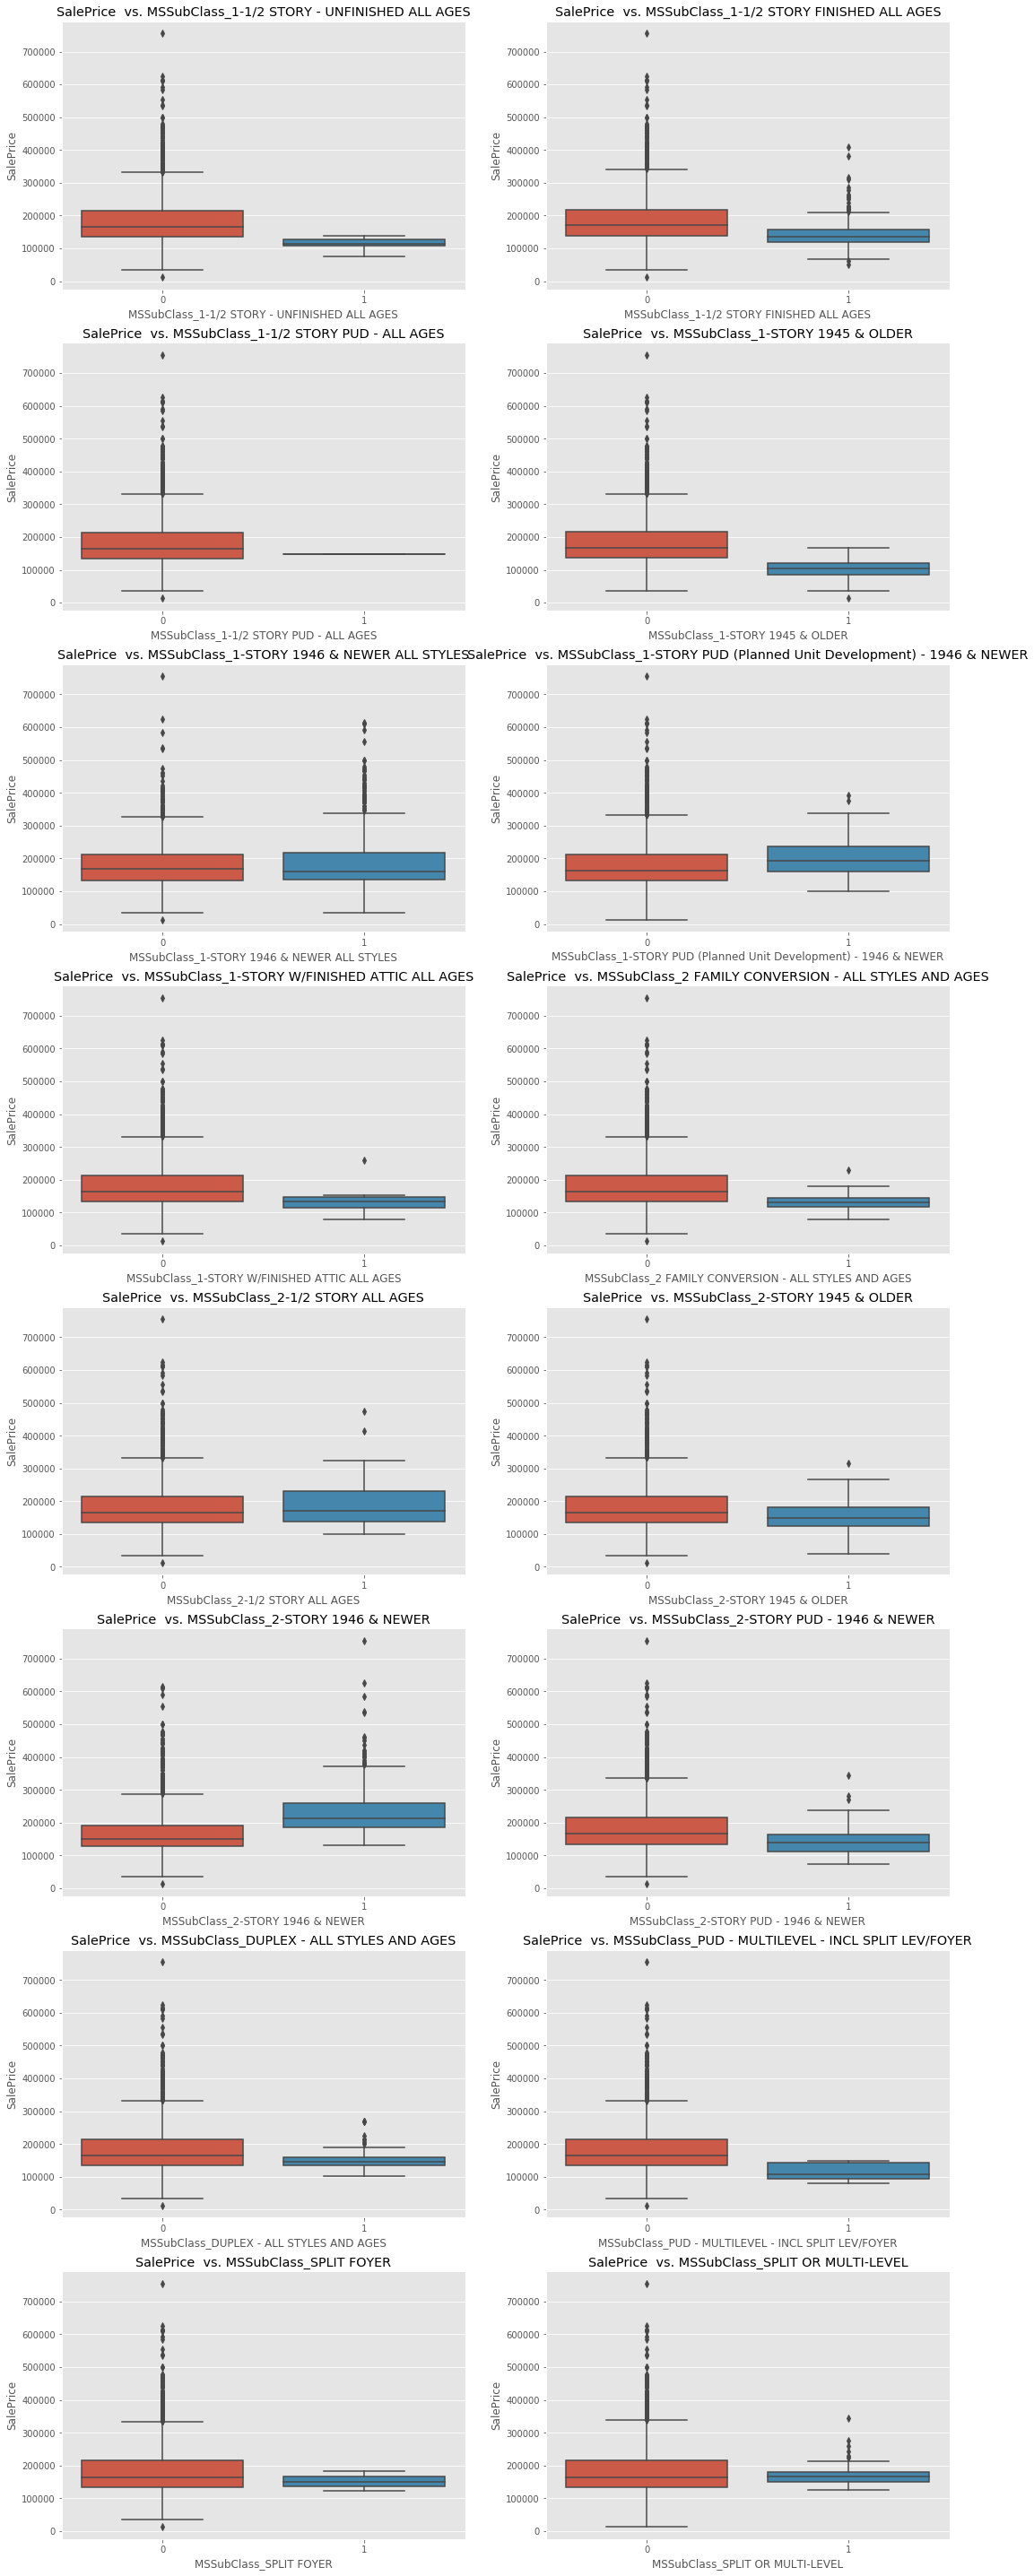

_____________________________________________________________________________________________________________________________
_____________________________________________________________________________________________________________________________
                                                   MSZoning
_____________________________________________________________________________________________________________________________
_____________________________________________________________________________________________________________________________
0    2367
1      11
Name: MSZoning_C (all), dtype: int64
0    2269
1     109
Name: MSZoning_FV, dtype: int64
0    2377
1       1
Name: MSZoning_I (all), dtype: int64
0    2361
1      17
Name: MSZoning_RH, dtype: int64
1    1876
0     502
Name: MSZoning_RL, dtype: int64
0    2014
1     364
Name: MSZoning_RM, dtype: int64


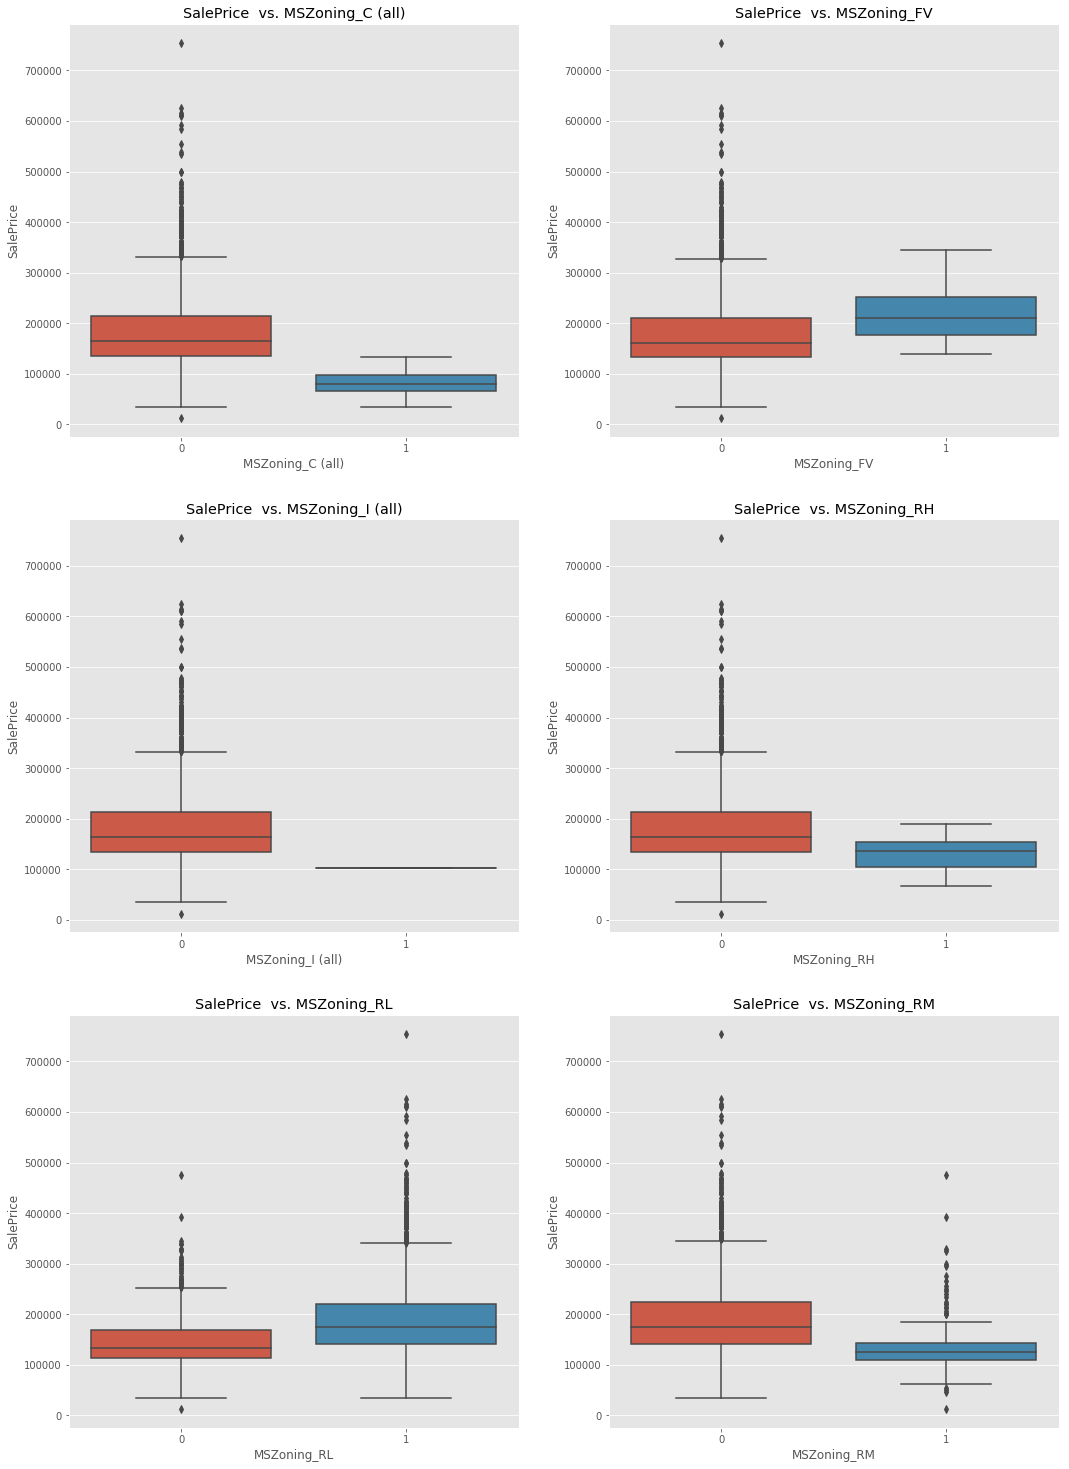

_____________________________________________________________________________________________________________________________
_____________________________________________________________________________________________________________________________
                                                   LandContour
_____________________________________________________________________________________________________________________________
_____________________________________________________________________________________________________________________________
0    2292
1      86
Name: LandContour_Bnk, dtype: int64
0    2284
1      94
Name: LandContour_HLS, dtype: int64
0    2330
1      48
Name: LandContour_Low, dtype: int64
1    2150
0     228
Name: LandContour_Lvl, dtype: int64


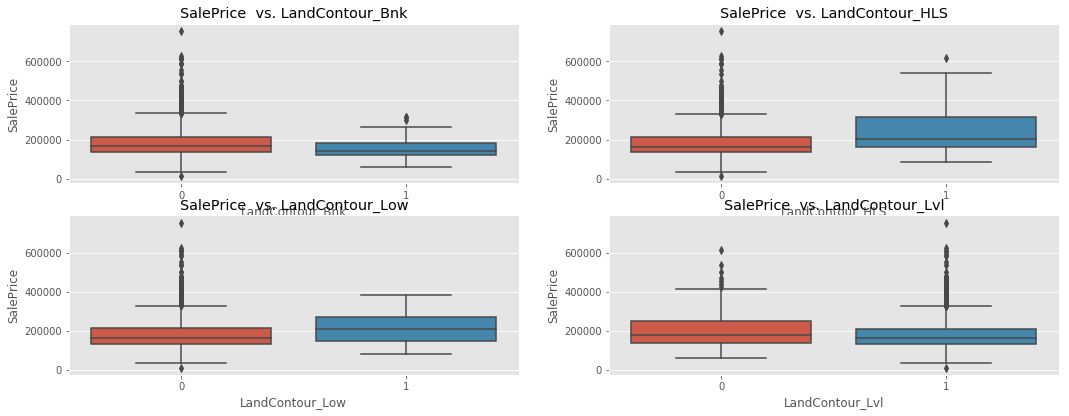

_____________________________________________________________________________________________________________________________
_____________________________________________________________________________________________________________________________
                                                   Utilities
_____________________________________________________________________________________________________________________________
_____________________________________________________________________________________________________________________________
1    2377
0       1
Name: Utilities_AllPub, dtype: int64
0    2377
1       1
Name: Utilities_NoSewr, dtype: int64


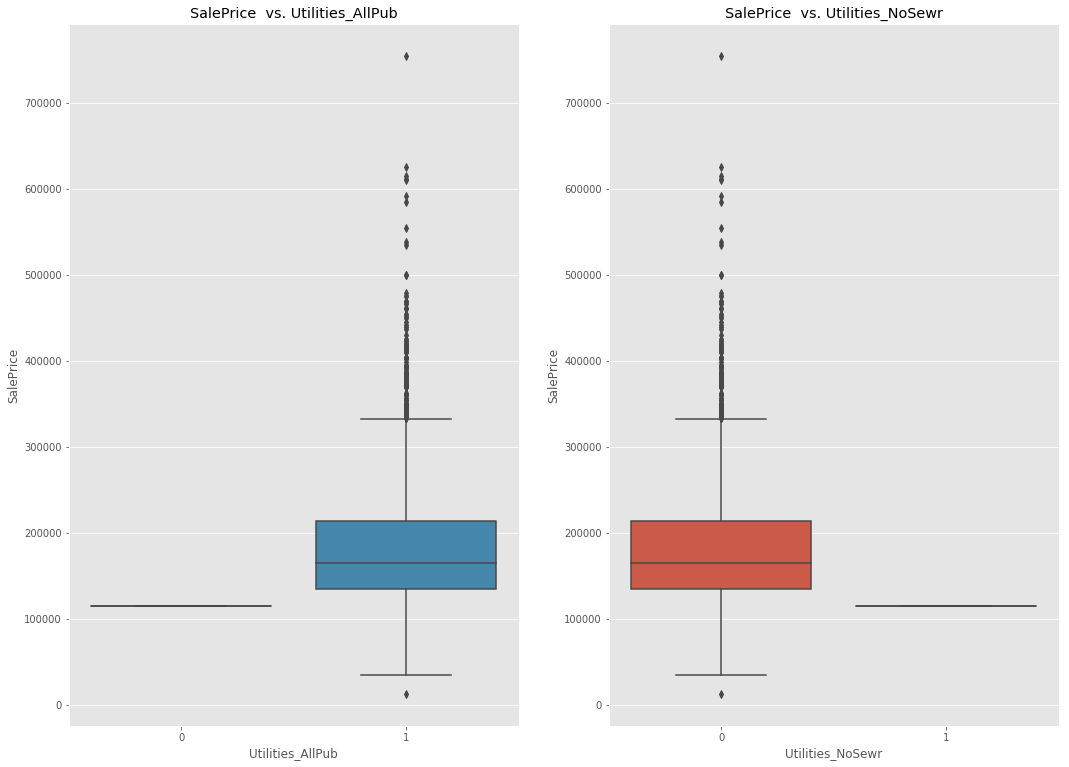

_____________________________________________________________________________________________________________________________
_____________________________________________________________________________________________________________________________
                                                   LotConfig
_____________________________________________________________________________________________________________________________
_____________________________________________________________________________________________________________________________
0    1972
1     406
Name: LotConfig_Corner, dtype: int64
0    2221
1     157
Name: LotConfig_CulDSac, dtype: int64
0    2306
1      72
Name: LotConfig_FR2, dtype: int64
0    2366
1      12
Name: LotConfig_FR3, dtype: int64
1    1731
0     647
Name: LotConfig_Inside, dtype: int64


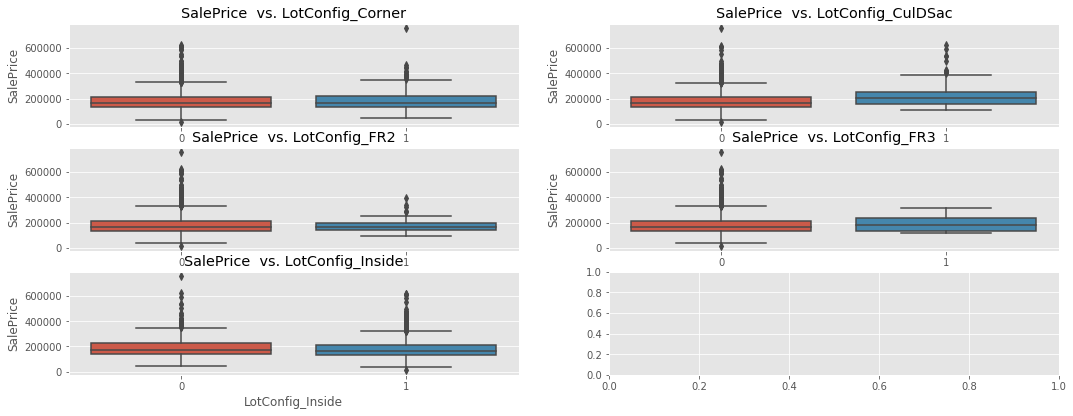

_____________________________________________________________________________________________________________________________
_____________________________________________________________________________________________________________________________
                                                   Neighborhood
_____________________________________________________________________________________________________________________________
_____________________________________________________________________________________________________________________________
0    2355
1      23
Name: Neighborhood_Blmngtn, dtype: int64
0    2368
1      10
Name: Neighborhood_Blueste, dtype: int64
0    2349
1      29
Name: Neighborhood_BrDale, dtype: int64
0    2289
1      89
Name: Neighborhood_BrkSide, dtype: int64
0    2340
1      38
Name: Neighborhood_ClearCr, dtype: int64
0    2147
1     231
Name: Neighborhood_CollgCr, dtype: int64
0    2284
1      94
Name: Neighborhood_Crawfor, dtype: int64
0    2

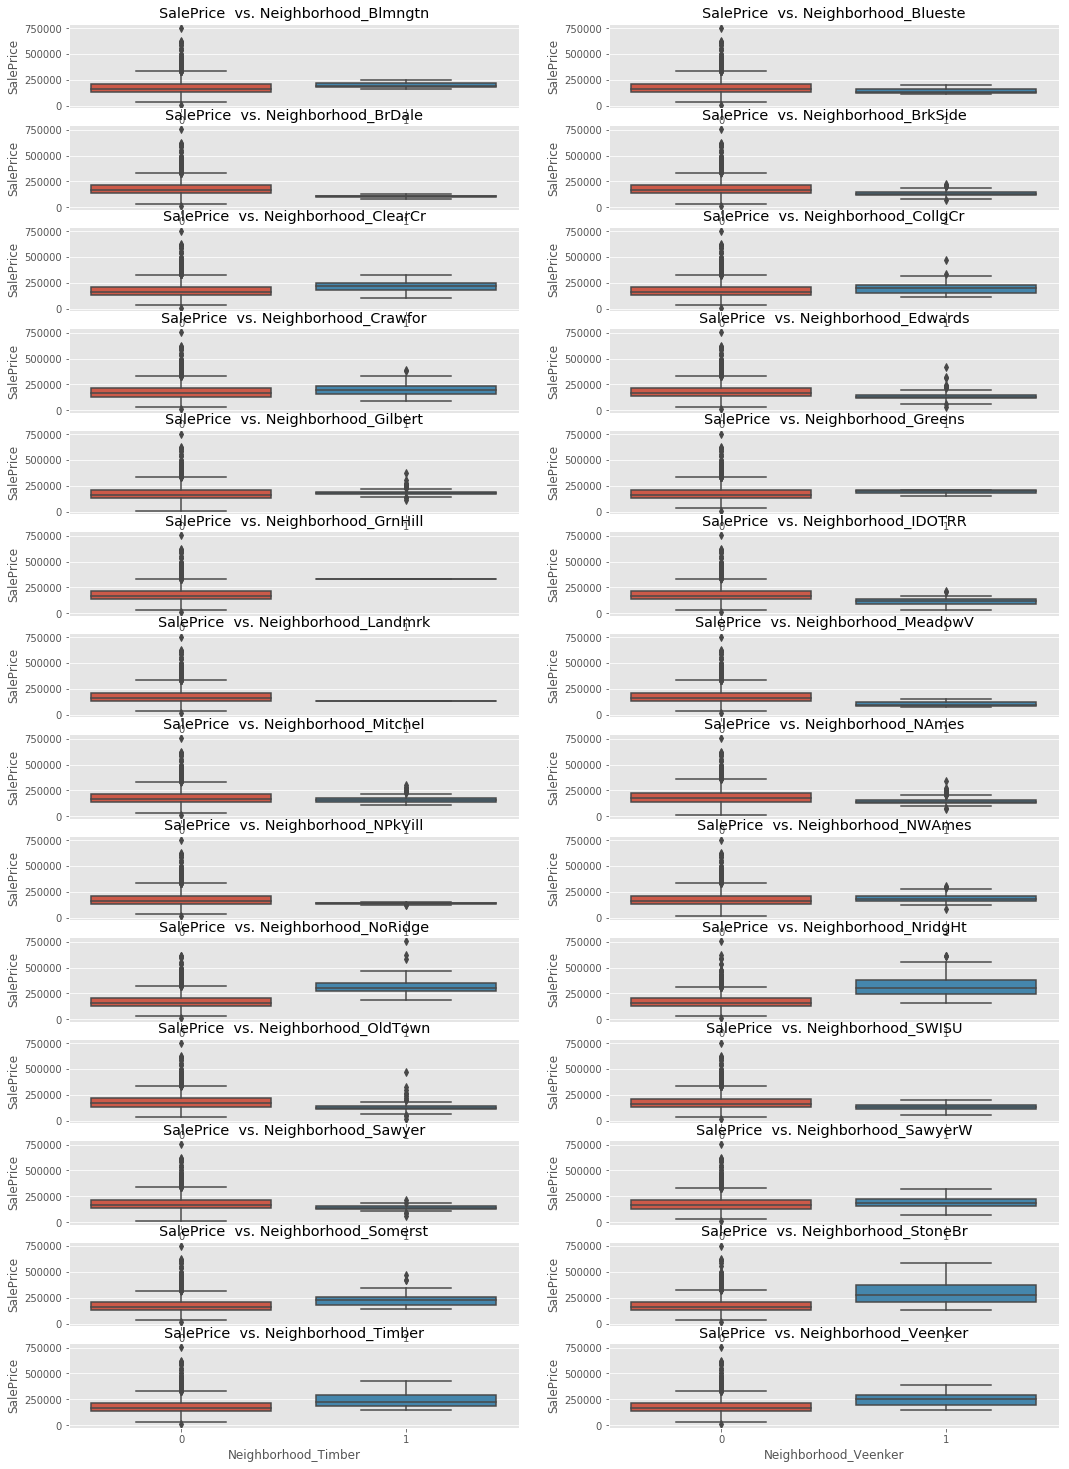

_____________________________________________________________________________________________________________________________
_____________________________________________________________________________________________________________________________
                                                   Condition1
_____________________________________________________________________________________________________________________________
_____________________________________________________________________________________________________________________________
0    2311
1      67
Name: Condition1_Artery, dtype: int64
0    2263
1     115
Name: Condition1_Feedr, dtype: int64
1    2069
0     309
Name: Condition1_Norm, dtype: int64
0    2360
1      18
Name: Condition1_PosA, dtype: int64
0    2341
1      37
Name: Condition1_PosN, dtype: int64
0    2356
1      22
Name: Condition1_RRAe, dtype: int64
0    2340
1      38
Name: Condition1_RRAn, dtype: int64
0    2374
1       4
Name: Condition1_RR

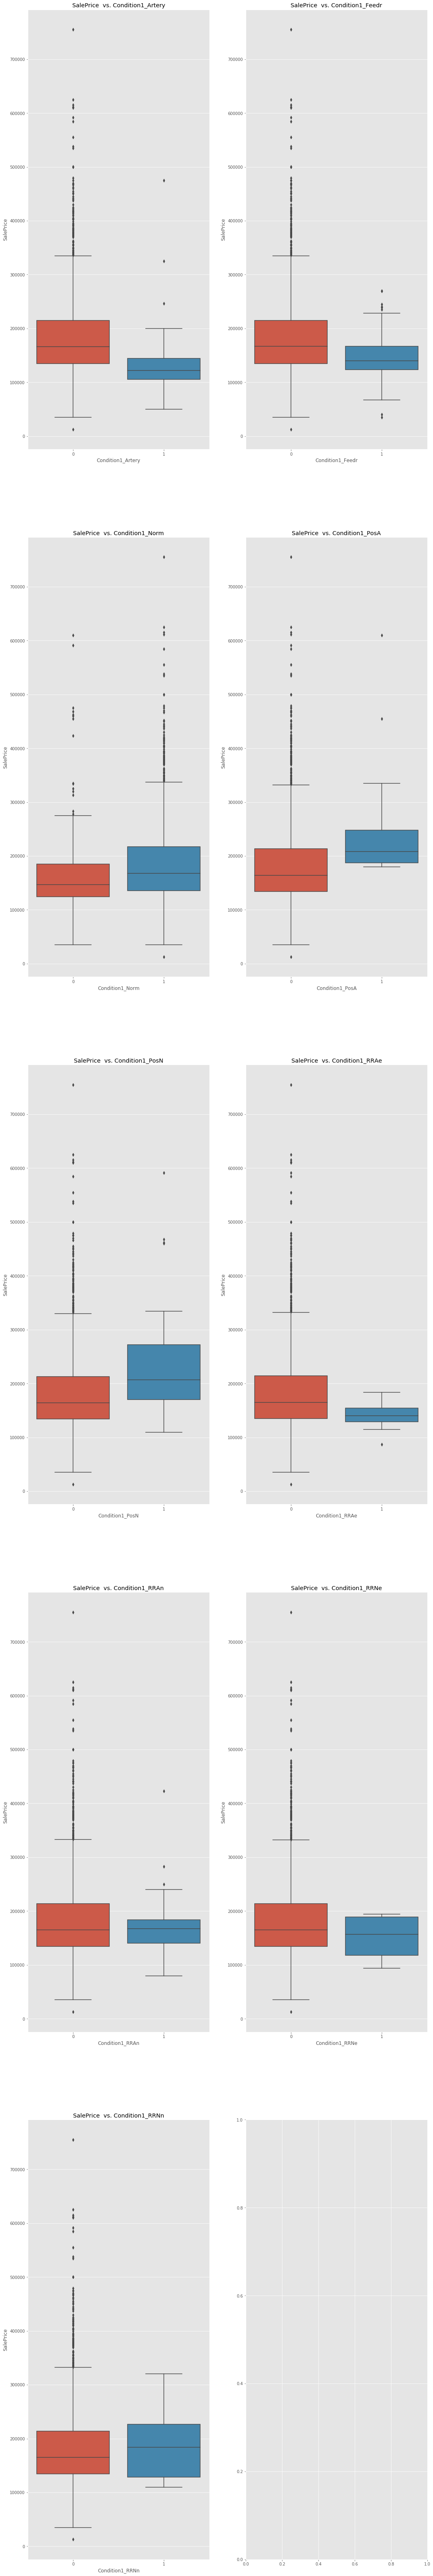

_____________________________________________________________________________________________________________________________
_____________________________________________________________________________________________________________________________
                                                   Condition2
_____________________________________________________________________________________________________________________________
_____________________________________________________________________________________________________________________________
0    2376
1       2
Name: Condition2_Artery, dtype: int64
0    2366
1      12
Name: Condition2_Feedr, dtype: int64
1    2354
0      24
Name: Condition2_Norm, dtype: int64
0    2375
1       3
Name: Condition2_PosA, dtype: int64
0    2375
1       3
Name: Condition2_PosN, dtype: int64
0    2377
1       1
Name: Condition2_RRAe, dtype: int64
0    2377
1       1
Name: Condition2_RRAn, dtype: int64
0    2376
1       2
Name: Condition2_RR

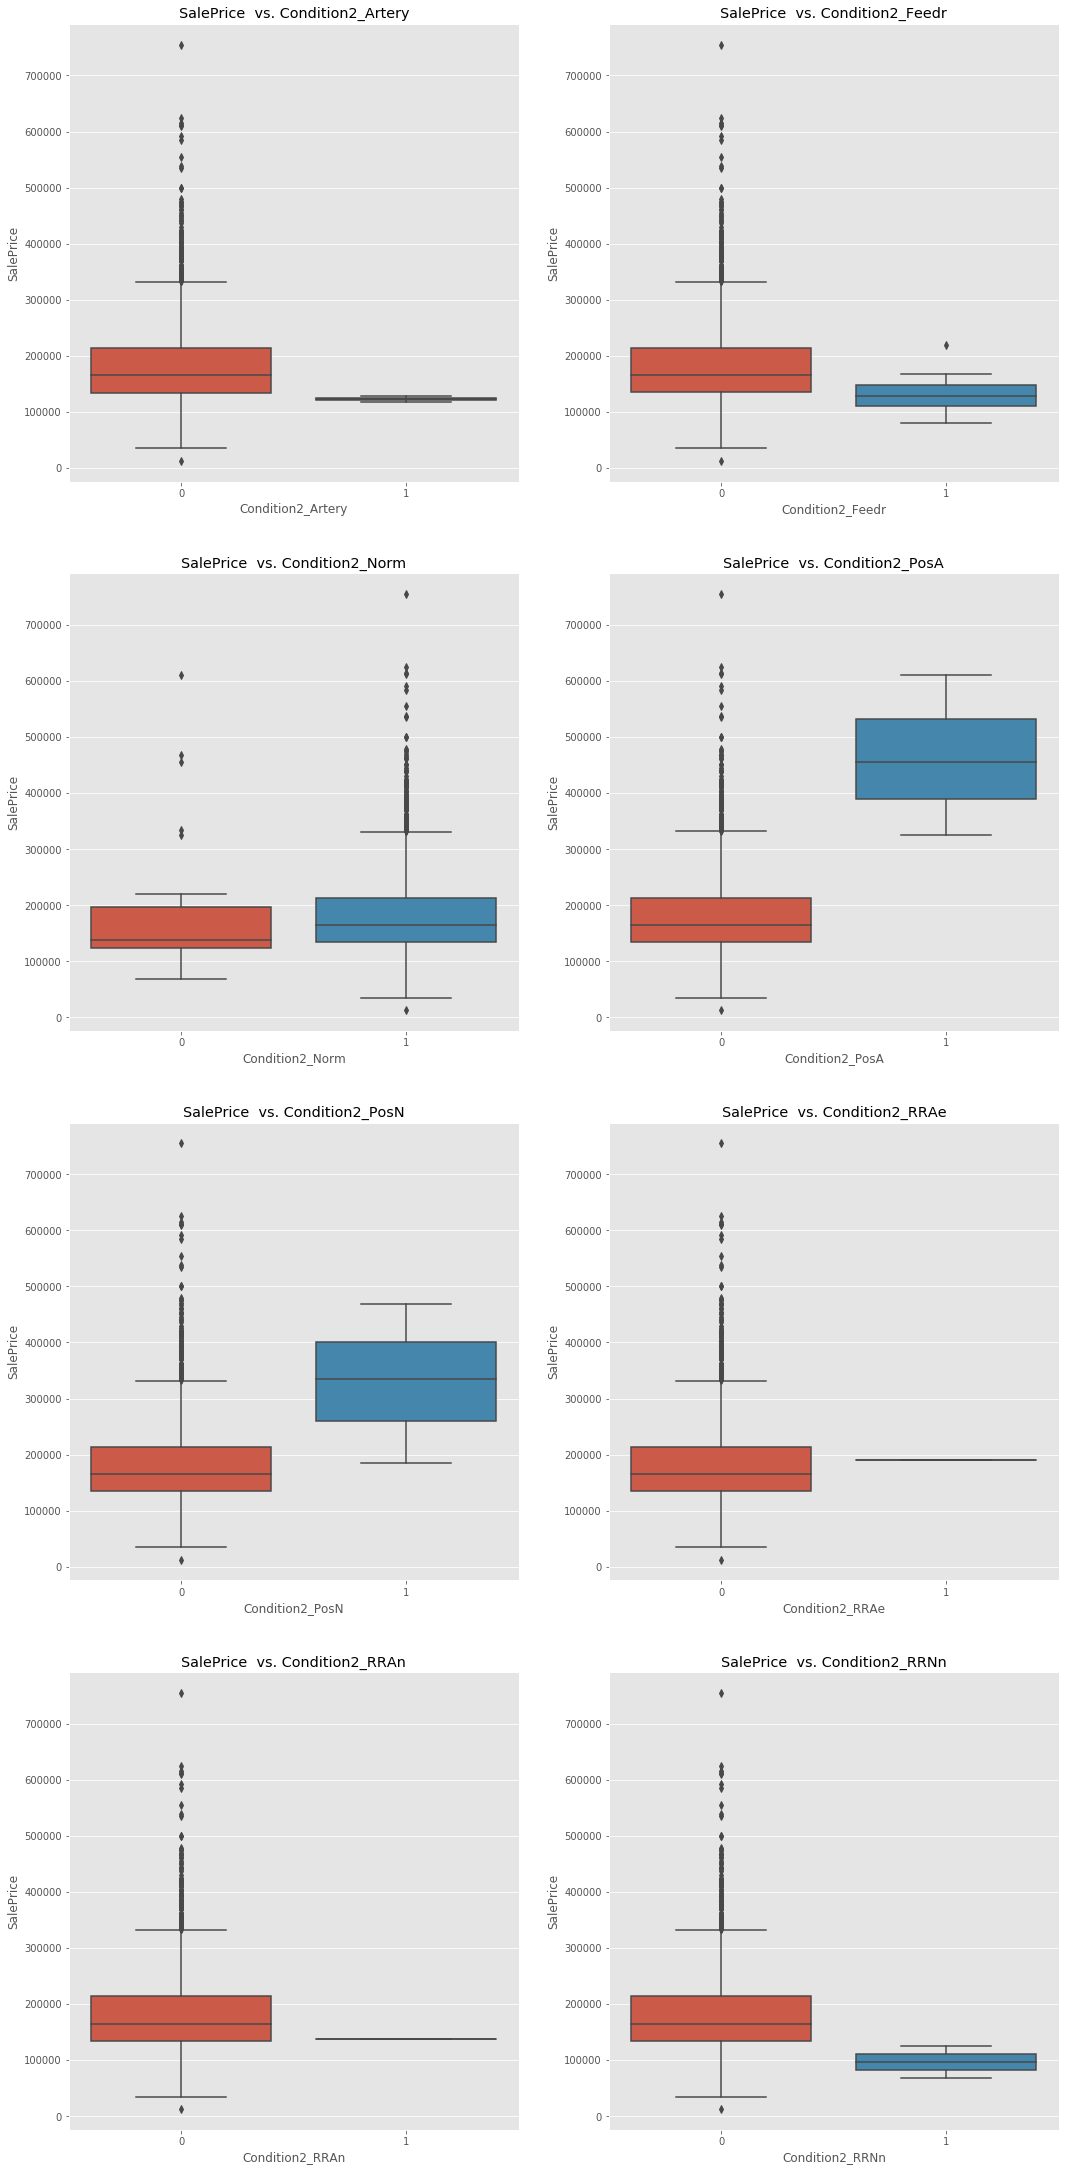

_____________________________________________________________________________________________________________________________
_____________________________________________________________________________________________________________________________
                                                   BldgType
_____________________________________________________________________________________________________________________________
_____________________________________________________________________________________________________________________________
1    2003
0     375
Name: BldgType_1Fam, dtype: int64
0    2341
1      37
Name: BldgType_2fmCon, dtype: int64
0    2327
1      51
Name: BldgType_Duplex, dtype: int64
0    2288
1      90
Name: BldgType_Twnhs, dtype: int64
0    2181
1     197
Name: BldgType_TwnhsE, dtype: int64


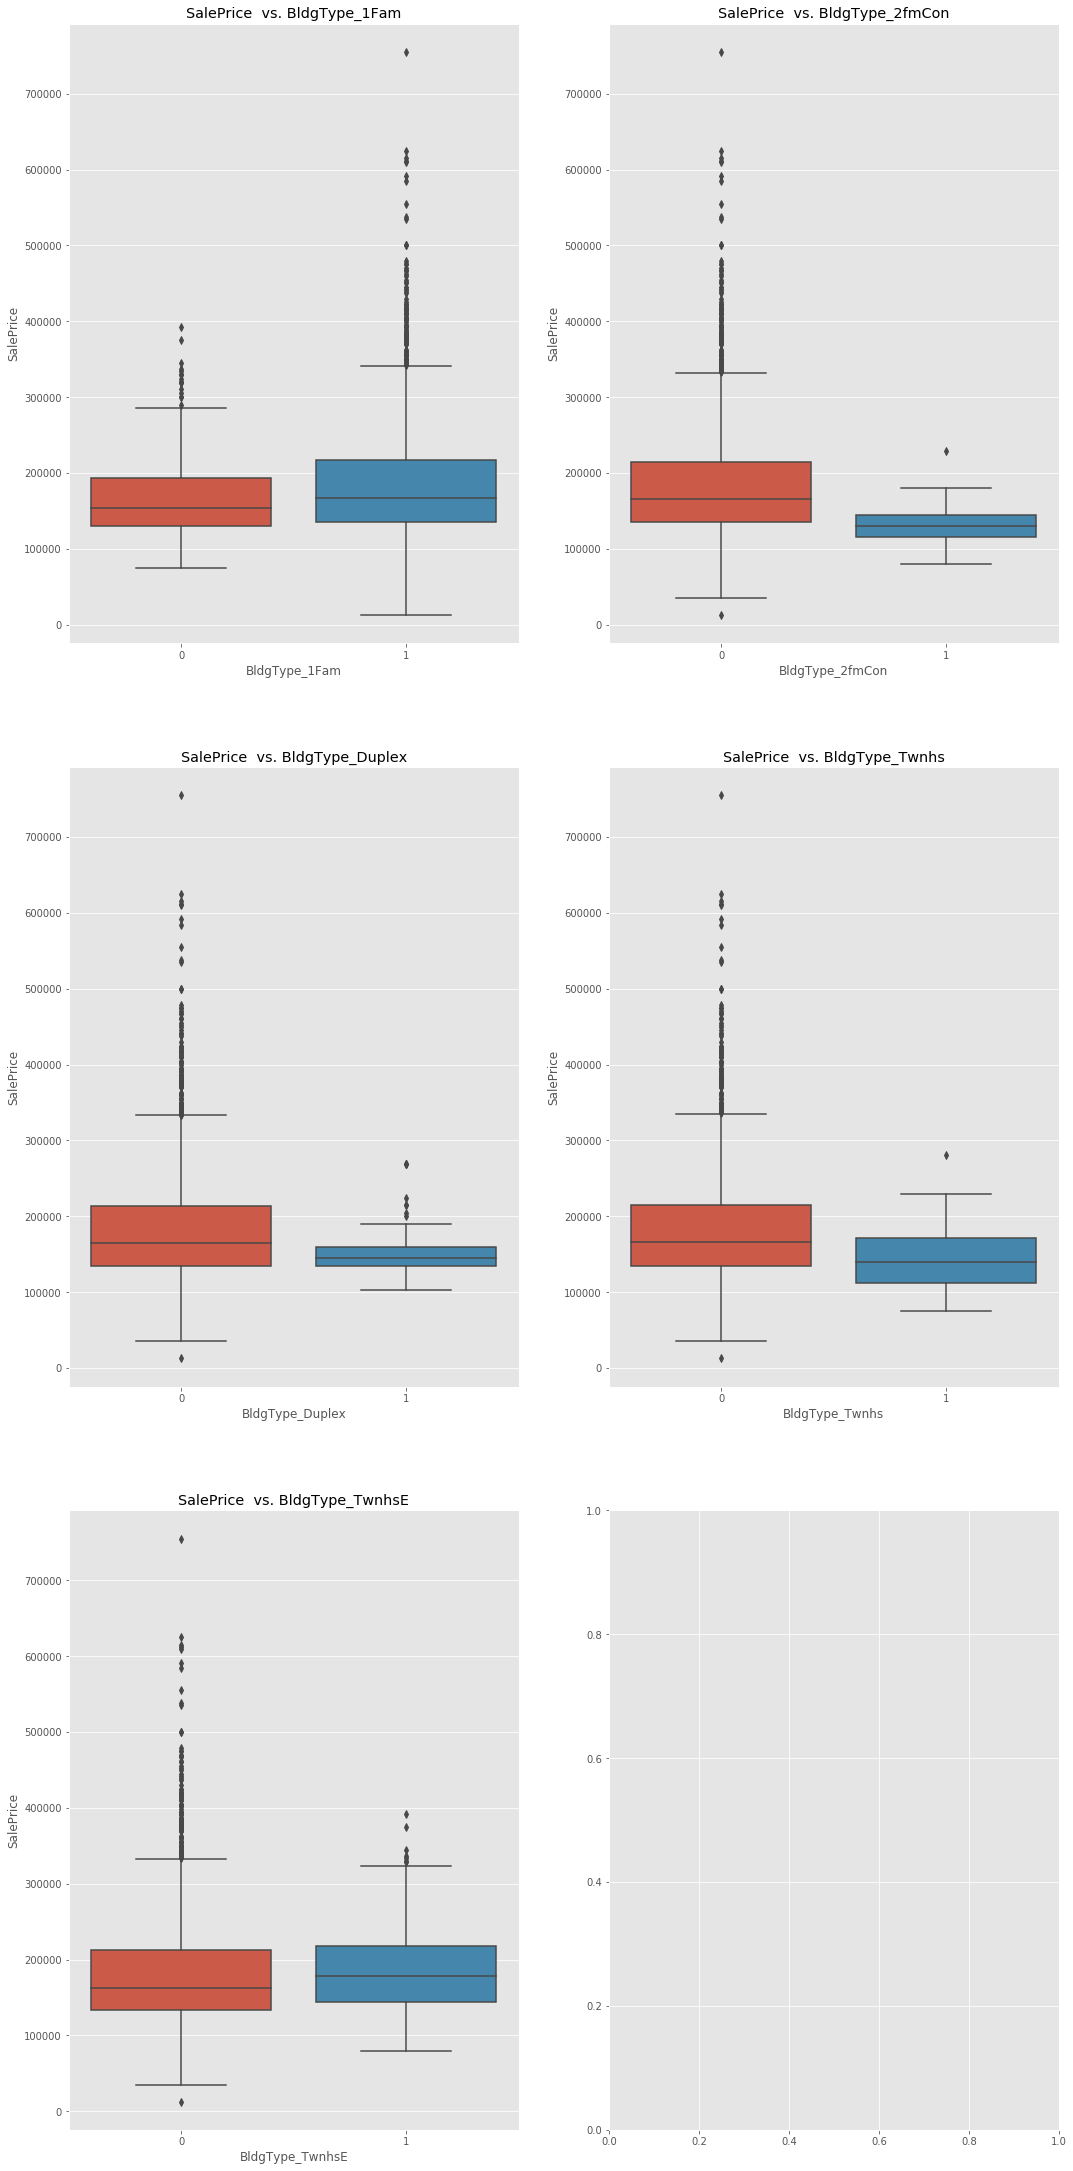

_____________________________________________________________________________________________________________________________
_____________________________________________________________________________________________________________________________
                                                   HouseStyle
_____________________________________________________________________________________________________________________________
_____________________________________________________________________________________________________________________________
0    2122
1     256
Name: HouseStyle_1.5Fin, dtype: int64
0    2363
1      15
Name: HouseStyle_1.5Unf, dtype: int64
0    1203
1    1175
Name: HouseStyle_1Story, dtype: int64
0    2372
1       6
Name: HouseStyle_2.5Fin, dtype: int64
0    2359
1      19
Name: HouseStyle_2.5Unf, dtype: int64
0    1645
1     733
Name: HouseStyle_2Story, dtype: int64
0    2319
1      59
Name: HouseStyle_SFoyer, dtype: int64
0    2263
1     115
Name: Ho

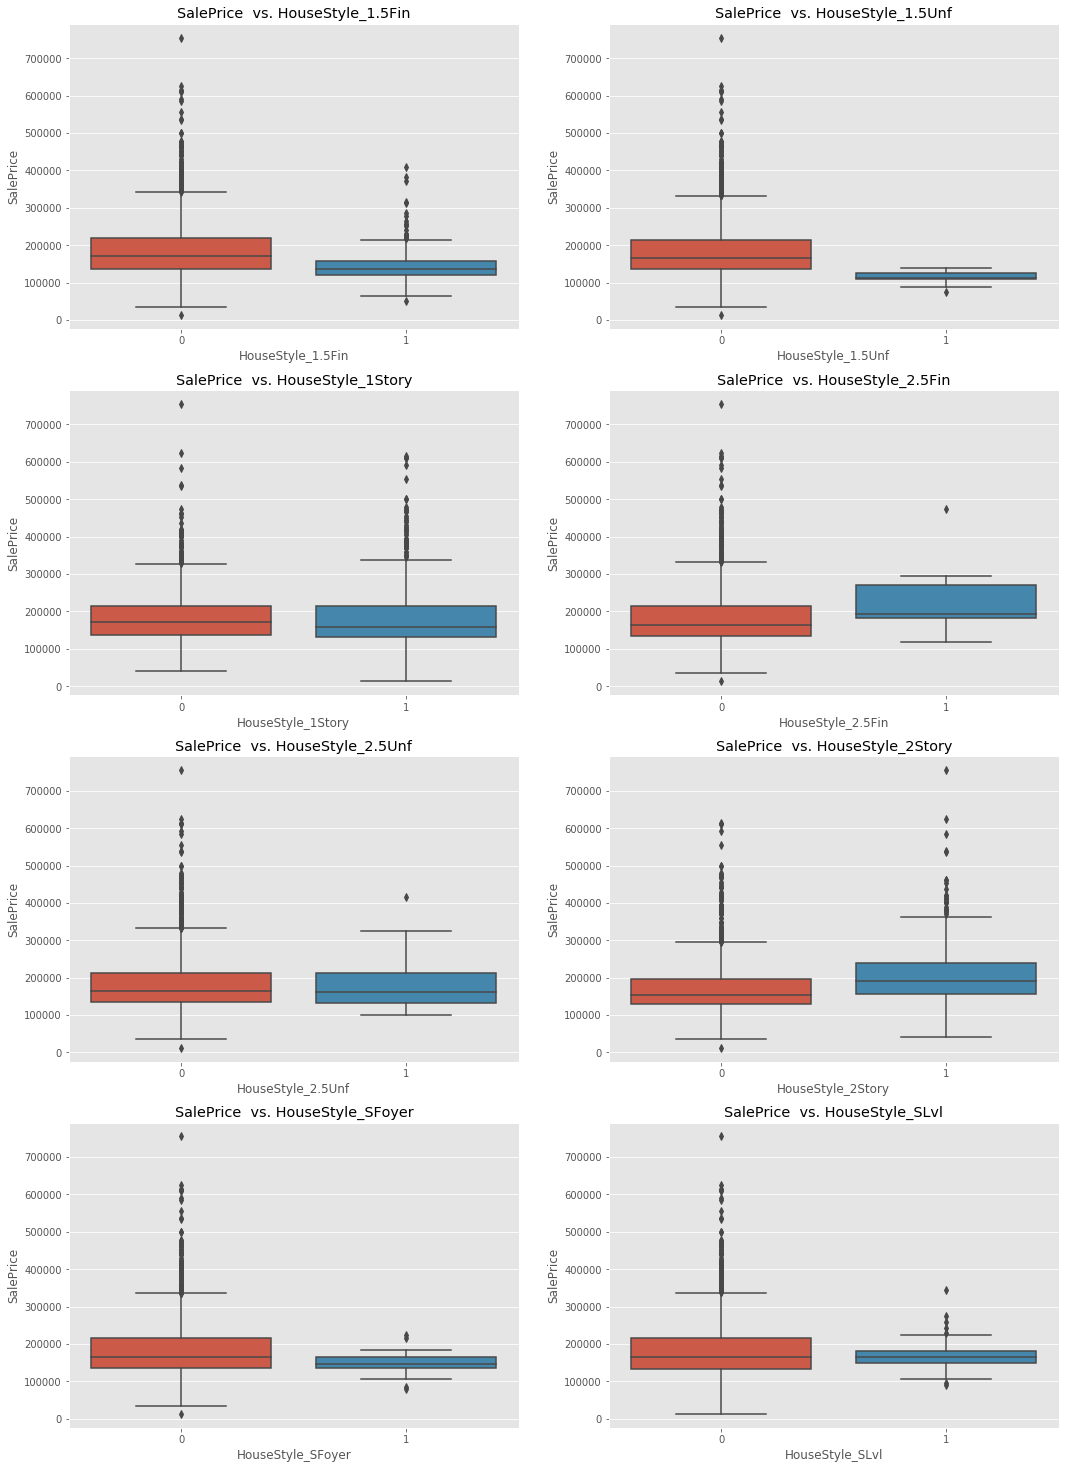

_____________________________________________________________________________________________________________________________
_____________________________________________________________________________________________________________________________
                                                   RoofStyle
_____________________________________________________________________________________________________________________________
_____________________________________________________________________________________________________________________________
0    2366
1      12
Name: RoofStyle_Flat, dtype: int64
1    1883
0     495
Name: RoofStyle_Gable, dtype: int64
0    2360
1      18
Name: RoofStyle_Gambrel, dtype: int64
0    1926
1     452
Name: RoofStyle_Hip, dtype: int64
0    2369
1       9
Name: RoofStyle_Mansard, dtype: int64
0    2374
1       4
Name: RoofStyle_Shed, dtype: int64


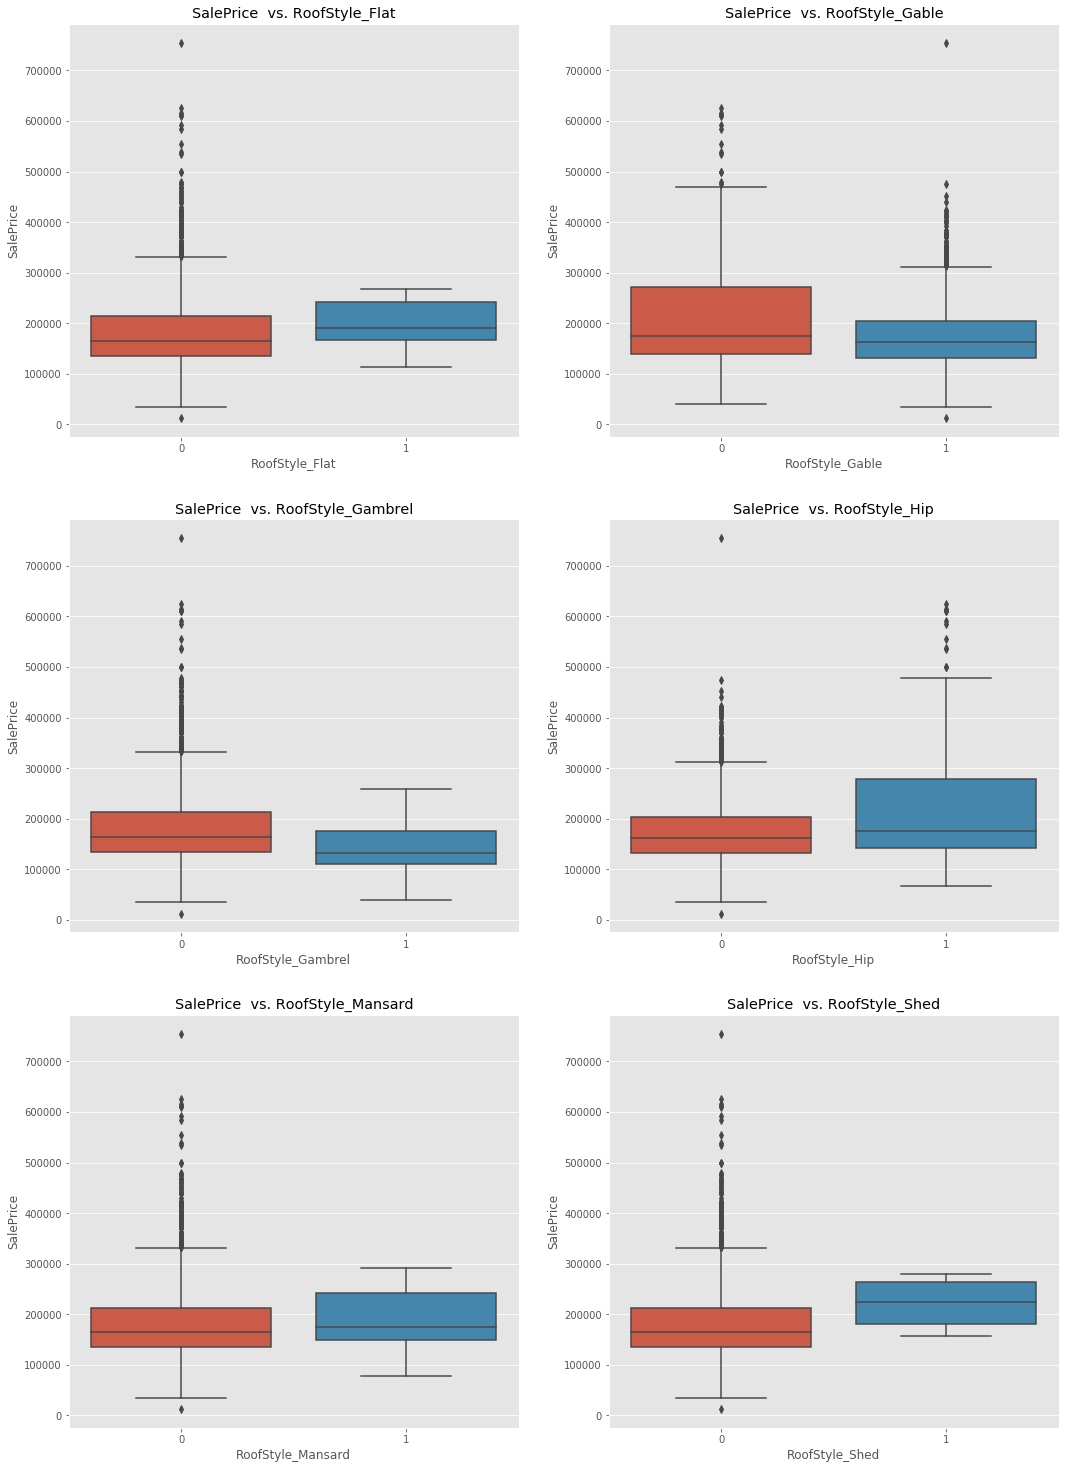

_____________________________________________________________________________________________________________________________
_____________________________________________________________________________________________________________________________
                                                   RoofMatl
_____________________________________________________________________________________________________________________________
_____________________________________________________________________________________________________________________________
1    2347
0      31
Name: RoofMatl_CompShg, dtype: int64
0    2377
1       1
Name: RoofMatl_Membran, dtype: int64
0    2377
1       1
Name: RoofMatl_Metal, dtype: int64
0    2377
1       1
Name: RoofMatl_Roll, dtype: int64
0    2365
1      13
Name: RoofMatl_Tar&Grv, dtype: int64
0    2370
1       8
Name: RoofMatl_WdShake, dtype: int64
0    2371
1       7
Name: RoofMatl_WdShngl, dtype: int64


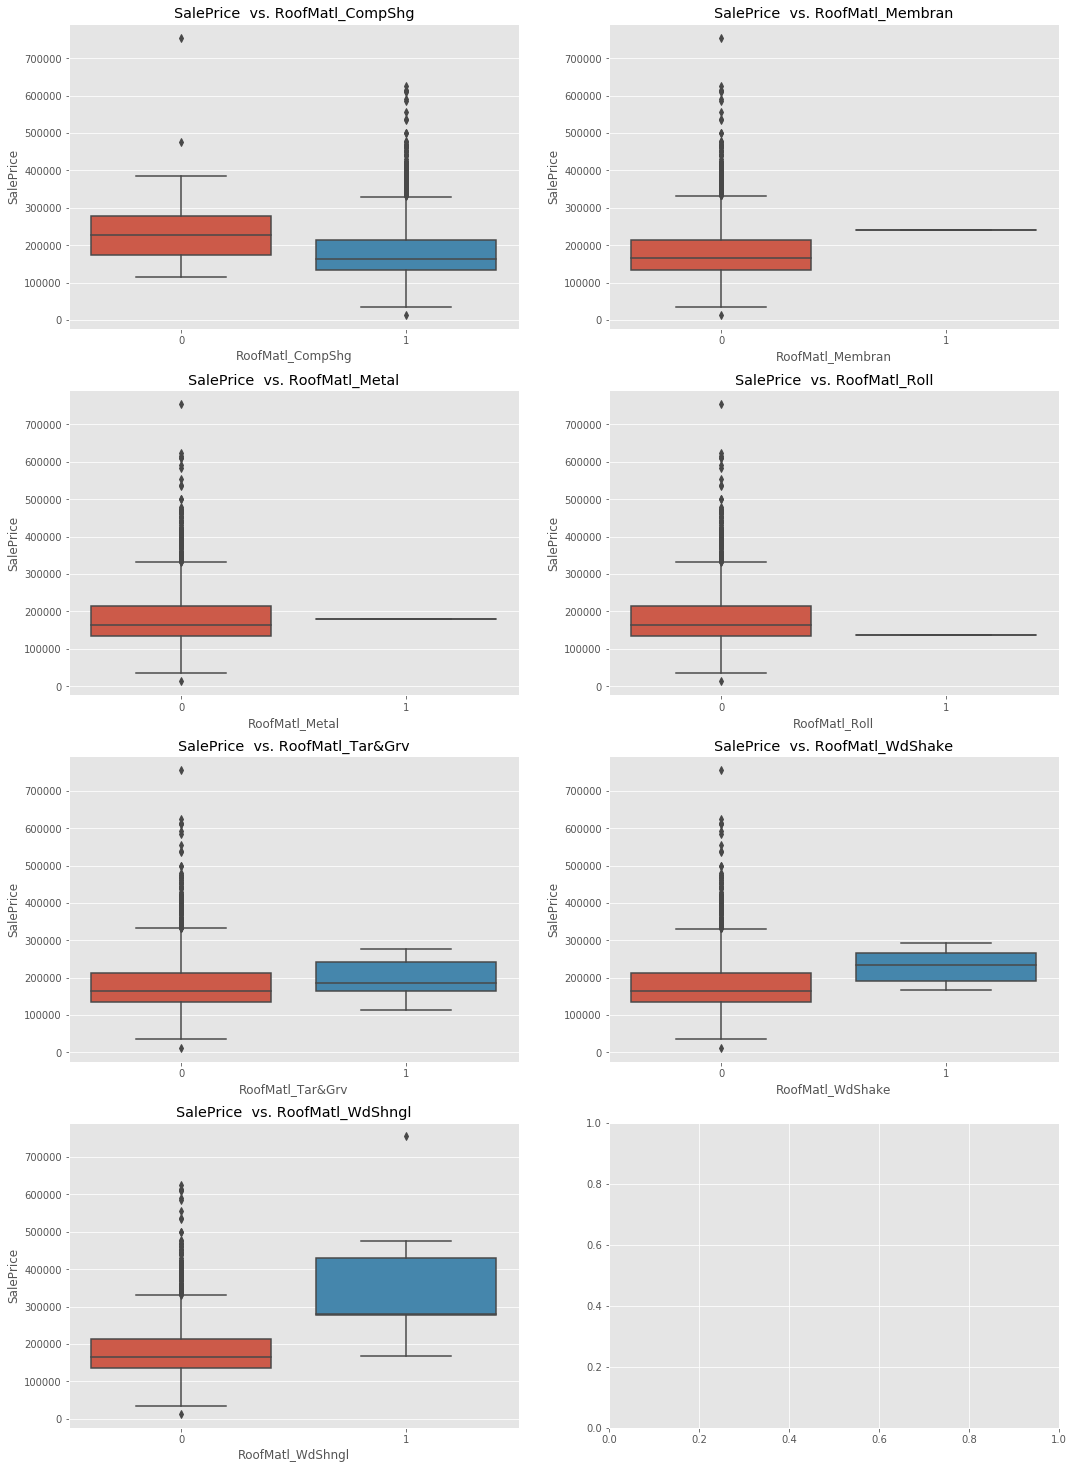

_____________________________________________________________________________________________________________________________
_____________________________________________________________________________________________________________________________
                                                   Exterior1st
_____________________________________________________________________________________________________________________________
_____________________________________________________________________________________________________________________________
0    2350
1      28
Name: Exterior1st_AsbShng, dtype: int64
0    2374
1       4
Name: Exterior1st_BrkComm, dtype: int64
0    2309
1      69
Name: Exterior1st_BrkFace, dtype: int64
0    2377
1       1
Name: Exterior1st_CBlock, dtype: int64
0    2295
1      83
Name: Exterior1st_CemntBd, dtype: int64
0    1980
1     398
Name: Exterior1st_HdBoard, dtype: int64
0    2377
1       1
Name: Exterior1st_ImStucc, dtype: int64
0    1999
1   

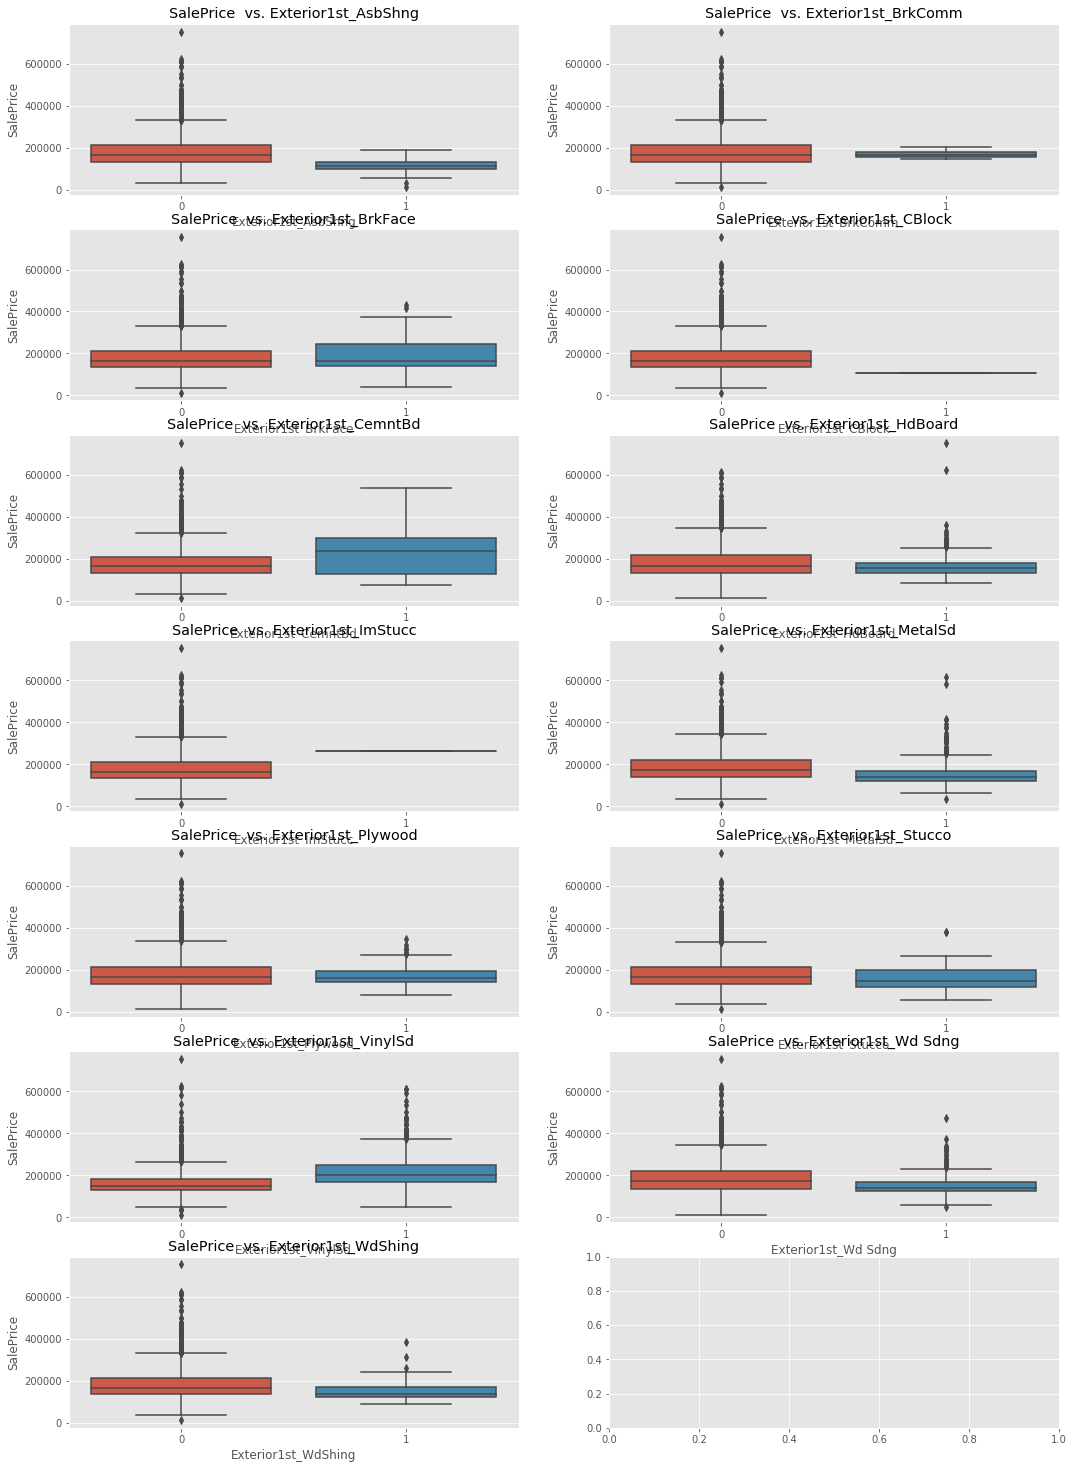

_____________________________________________________________________________________________________________________________
_____________________________________________________________________________________________________________________________
                                                   Exterior2nd
_____________________________________________________________________________________________________________________________
_____________________________________________________________________________________________________________________________
0    2352
1      26
Name: Exterior2nd_AsbShng, dtype: int64
0    2376
1       2
Name: Exterior2nd_AsphShn, dtype: int64
0    2358
1      20
Name: Exterior2nd_Brk Cmn, dtype: int64
0    2336
1      42
Name: Exterior2nd_BrkFace, dtype: int64
0    2377
1       1
Name: Exterior2nd_CBlock, dtype: int64
0    2295
1      83
Name: Exterior2nd_CmentBd, dtype: int64
0    2017
1     361
Name: Exterior2nd_HdBoard, dtype: int64
0    2365
1   

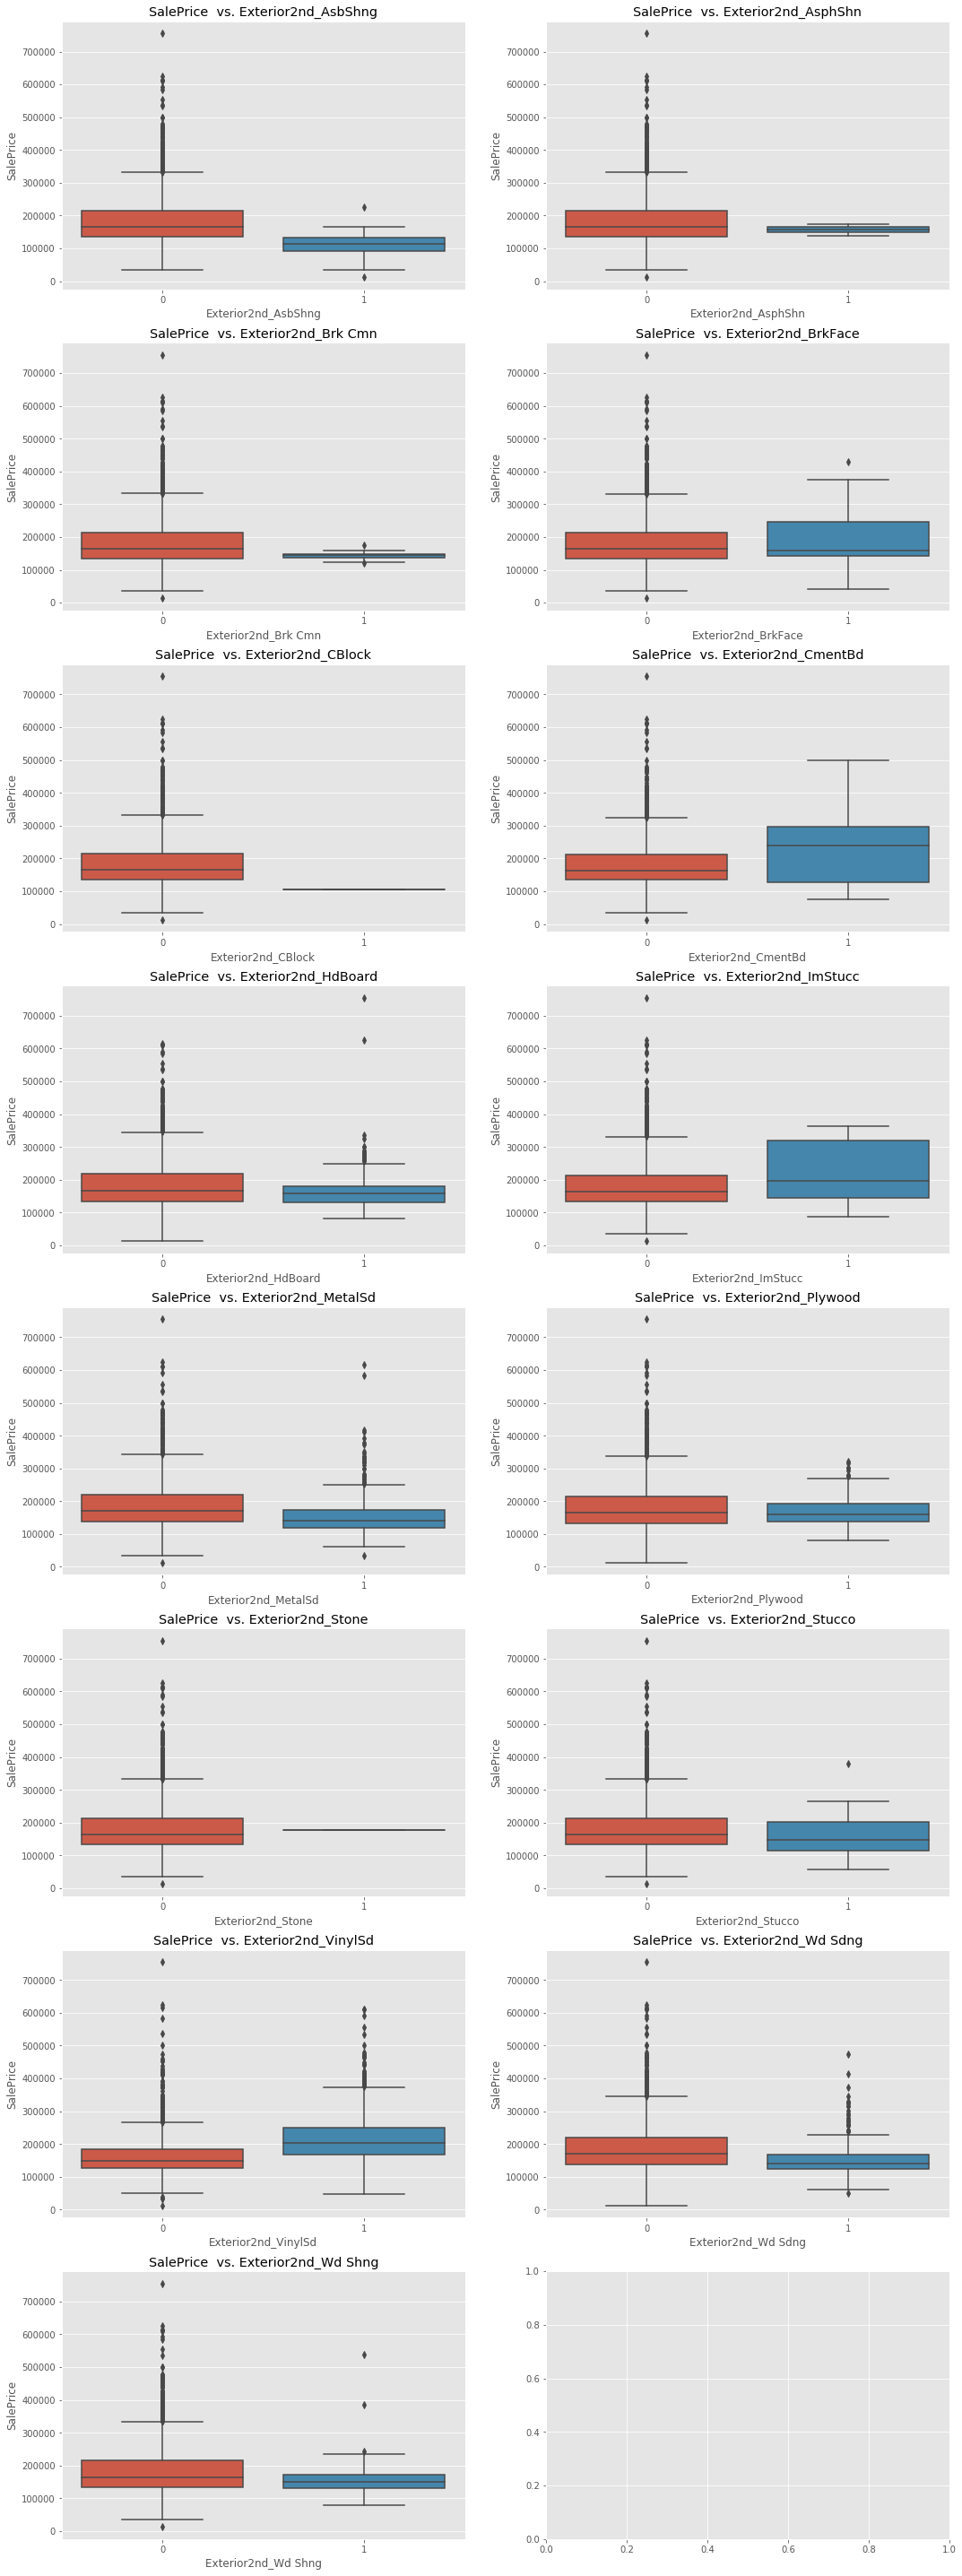

_____________________________________________________________________________________________________________________________
_____________________________________________________________________________________________________________________________
                                                   MasVnrType
_____________________________________________________________________________________________________________________________
_____________________________________________________________________________________________________________________________
0    2361
1      17
Name: MasVnrType_BrkCmn, dtype: int64
0    1594
1     784
Name: MasVnrType_BrkFace, dtype: int64
1    1395
0     983
Name: MasVnrType_None, dtype: int64
0    2196
1     182
Name: MasVnrType_Stone, dtype: int64


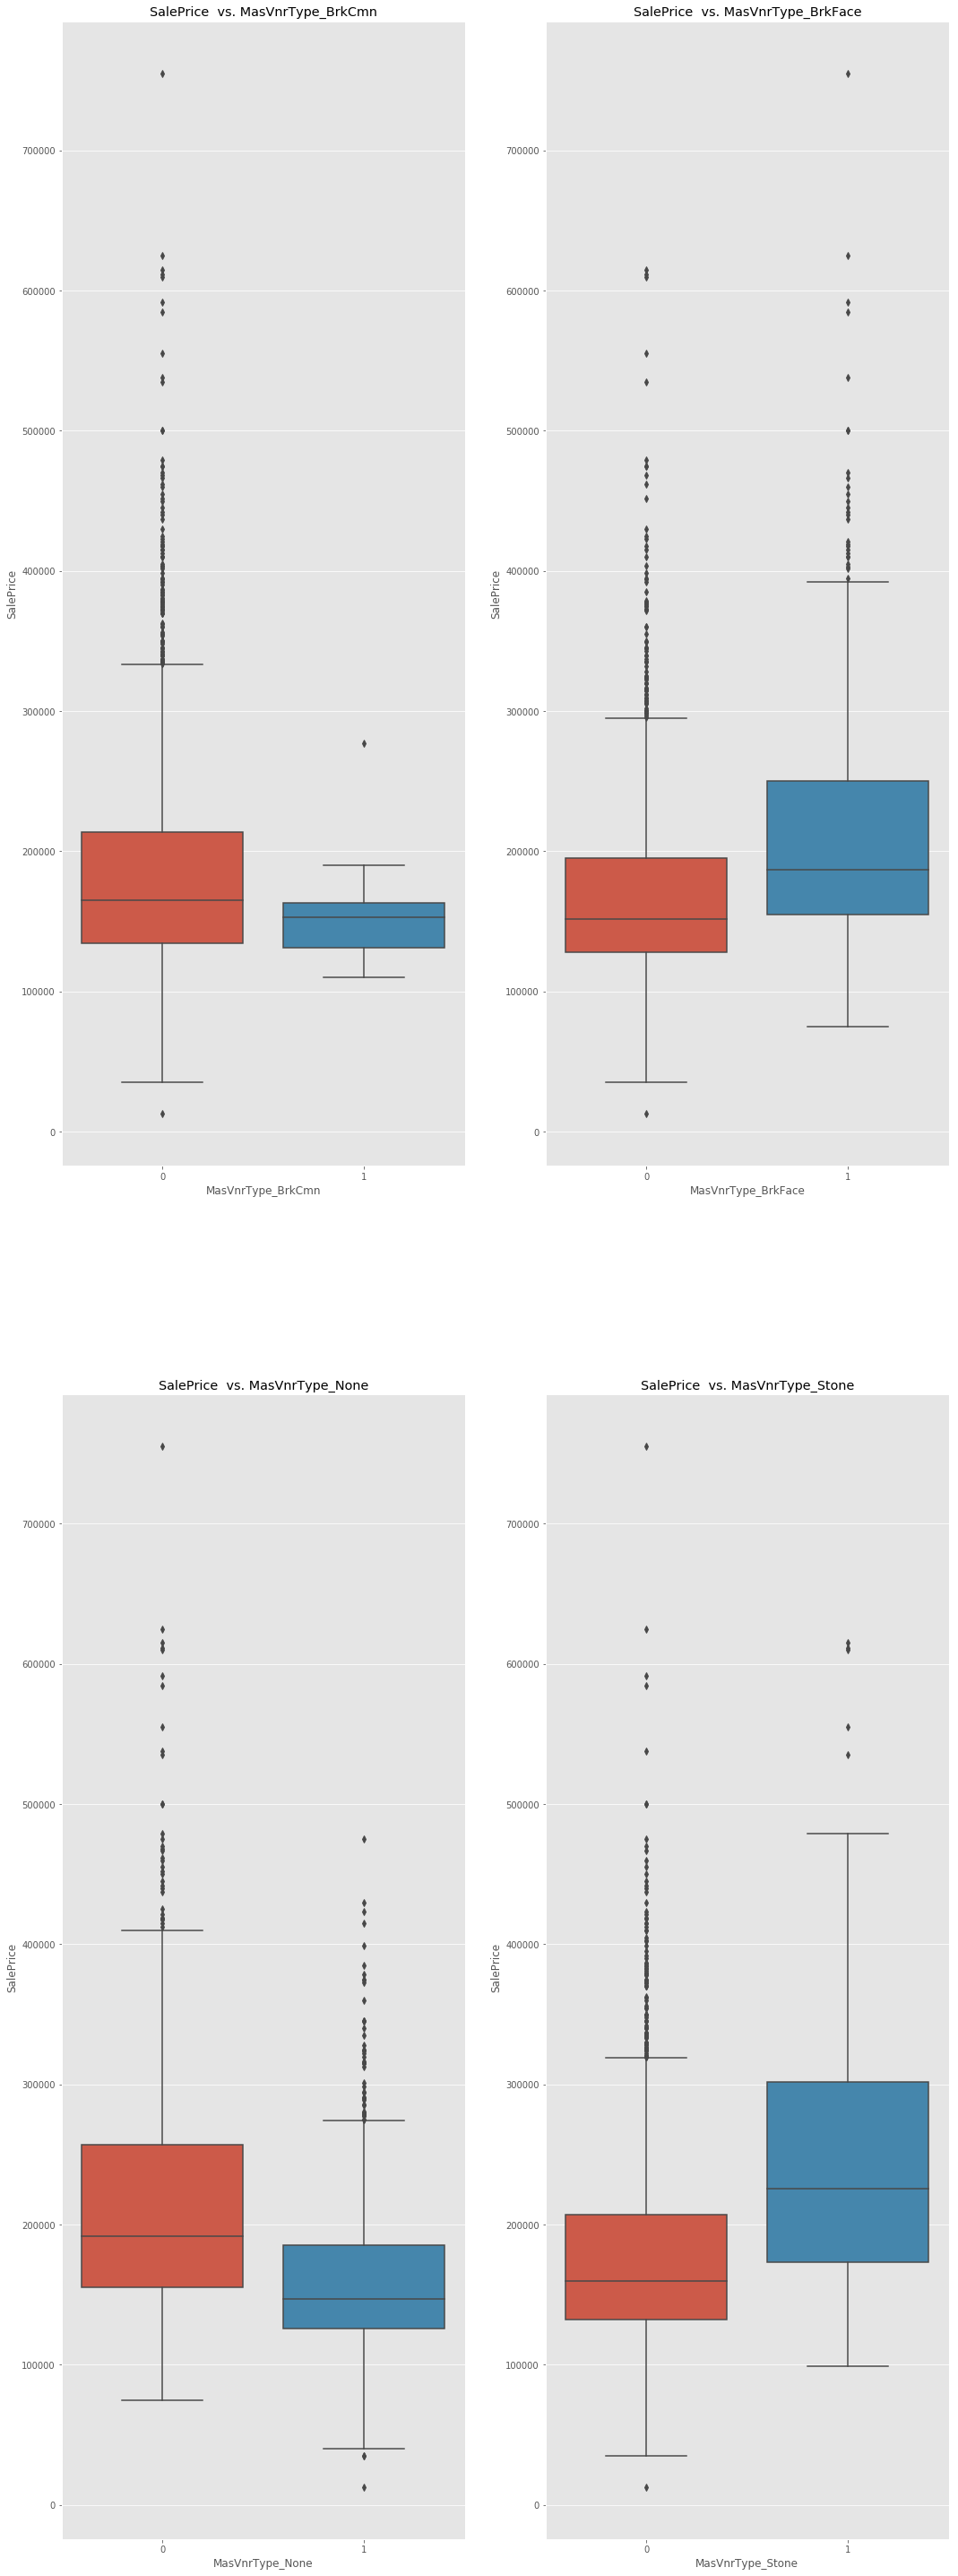

_____________________________________________________________________________________________________________________________
_____________________________________________________________________________________________________________________________
                                                   Foundation
_____________________________________________________________________________________________________________________________
_____________________________________________________________________________________________________________________________
0    2129
1     249
Name: Foundation_BrkTil, dtype: int64
0    1319
1    1059
Name: Foundation_CBlock, dtype: int64
0    1322
1    1056
Name: Foundation_PConc, dtype: int64
0    2369
1       9
Name: Foundation_Stone, dtype: int64
0    2373
1       5
Name: Foundation_Wood, dtype: int64


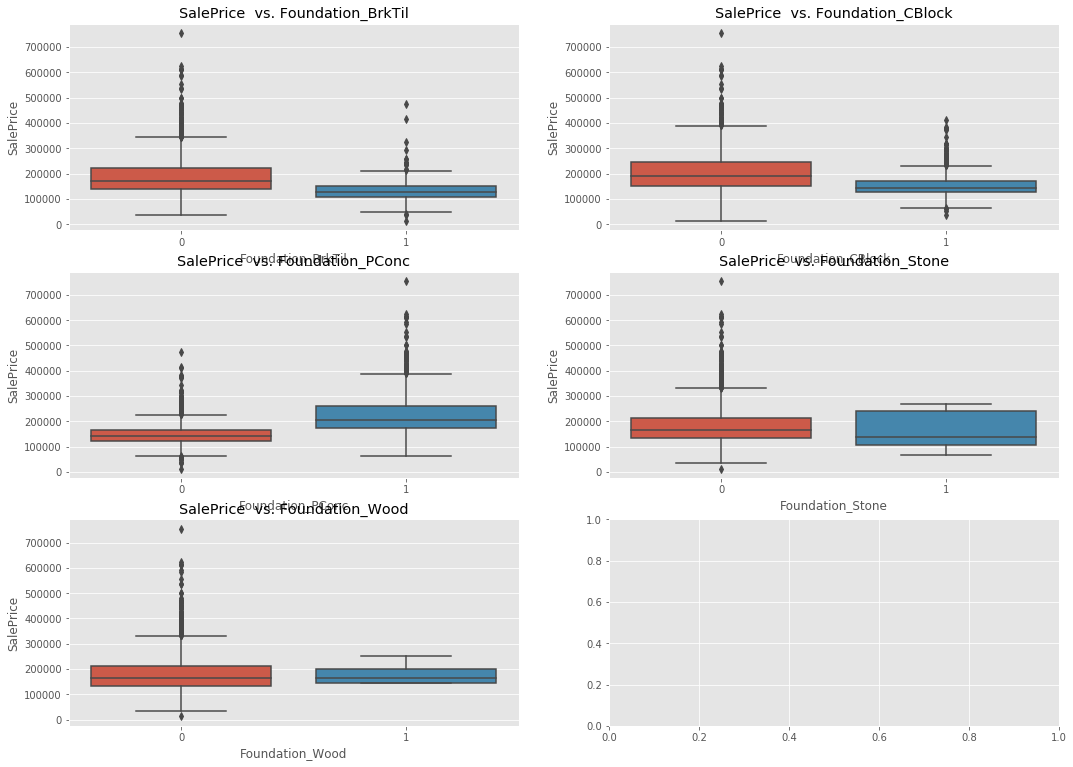

_____________________________________________________________________________________________________________________________
_____________________________________________________________________________________________________________________________
                                                   Heating
_____________________________________________________________________________________________________________________________
_____________________________________________________________________________________________________________________________
1    2351
0      27
Name: Heating_GasA, dtype: int64
0    2355
1      23
Name: Heating_GasW, dtype: int64
0    2375
1       3
Name: Heating_Grav, dtype: int64
0    2377
1       1
Name: Heating_OthW, dtype: int64


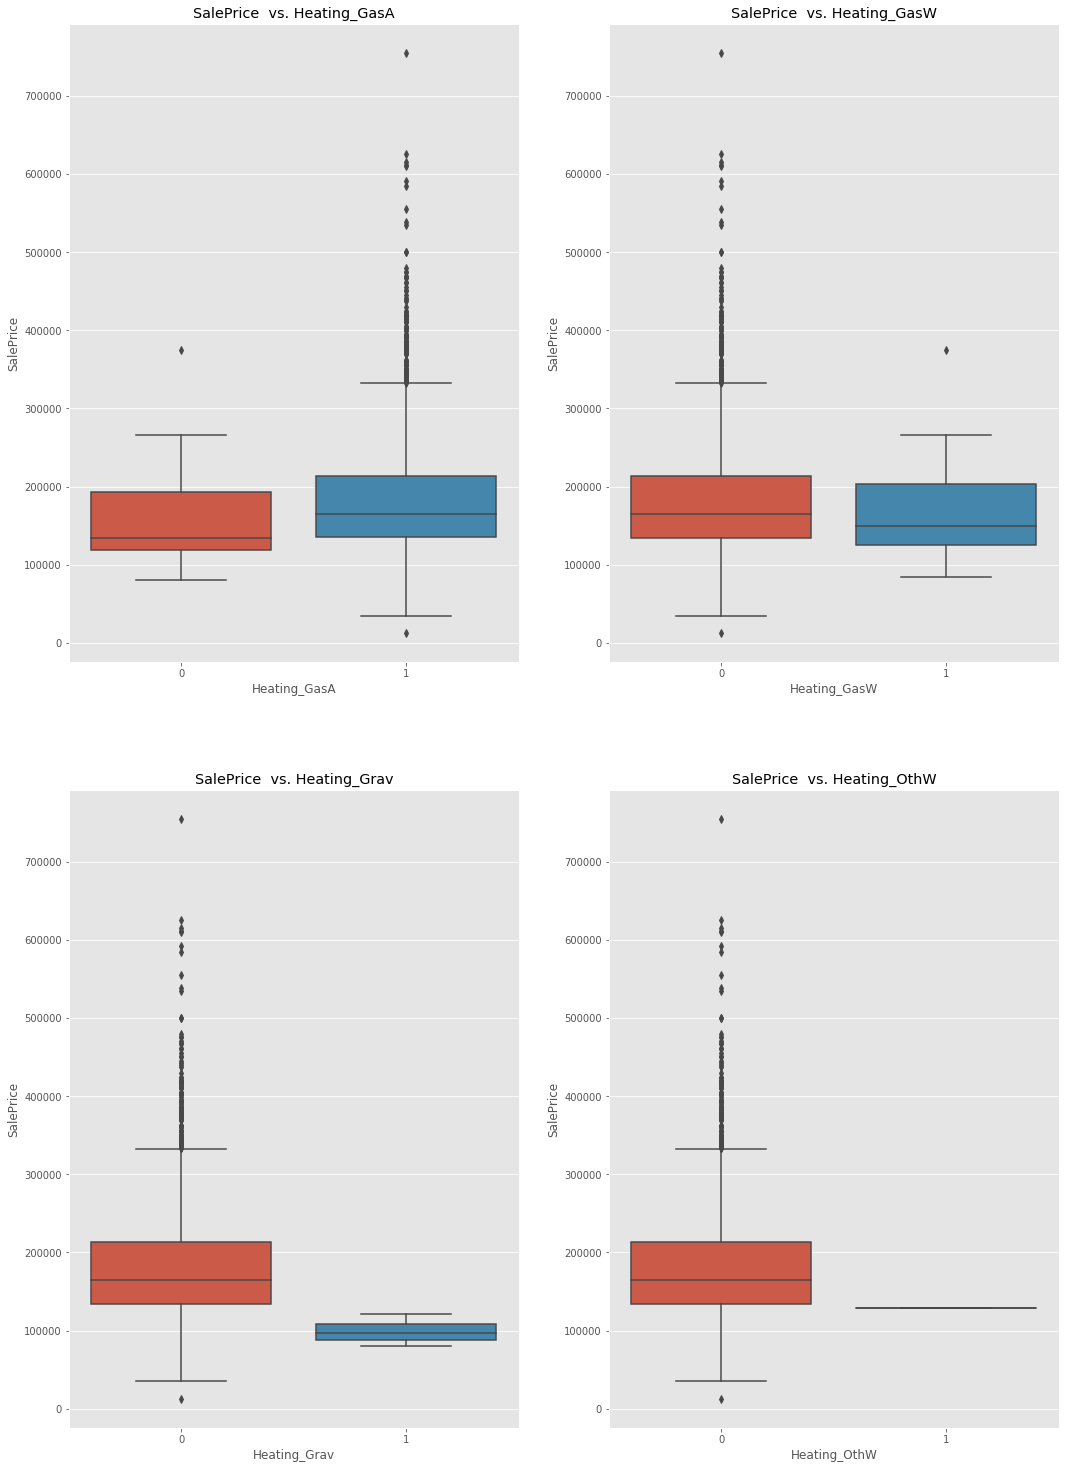

_____________________________________________________________________________________________________________________________
_____________________________________________________________________________________________________________________________
                                                   Electrical
_____________________________________________________________________________________________________________________________
_____________________________________________________________________________________________________________________________
0    2241
1     137
Name: Electrical_FuseA, dtype: int64
0    2353
1      25
Name: Electrical_FuseF, dtype: int64
0    2373
1       5
Name: Electrical_FuseP, dtype: int64
1    2211
0     167
Name: Electrical_SBrkr, dtype: int64


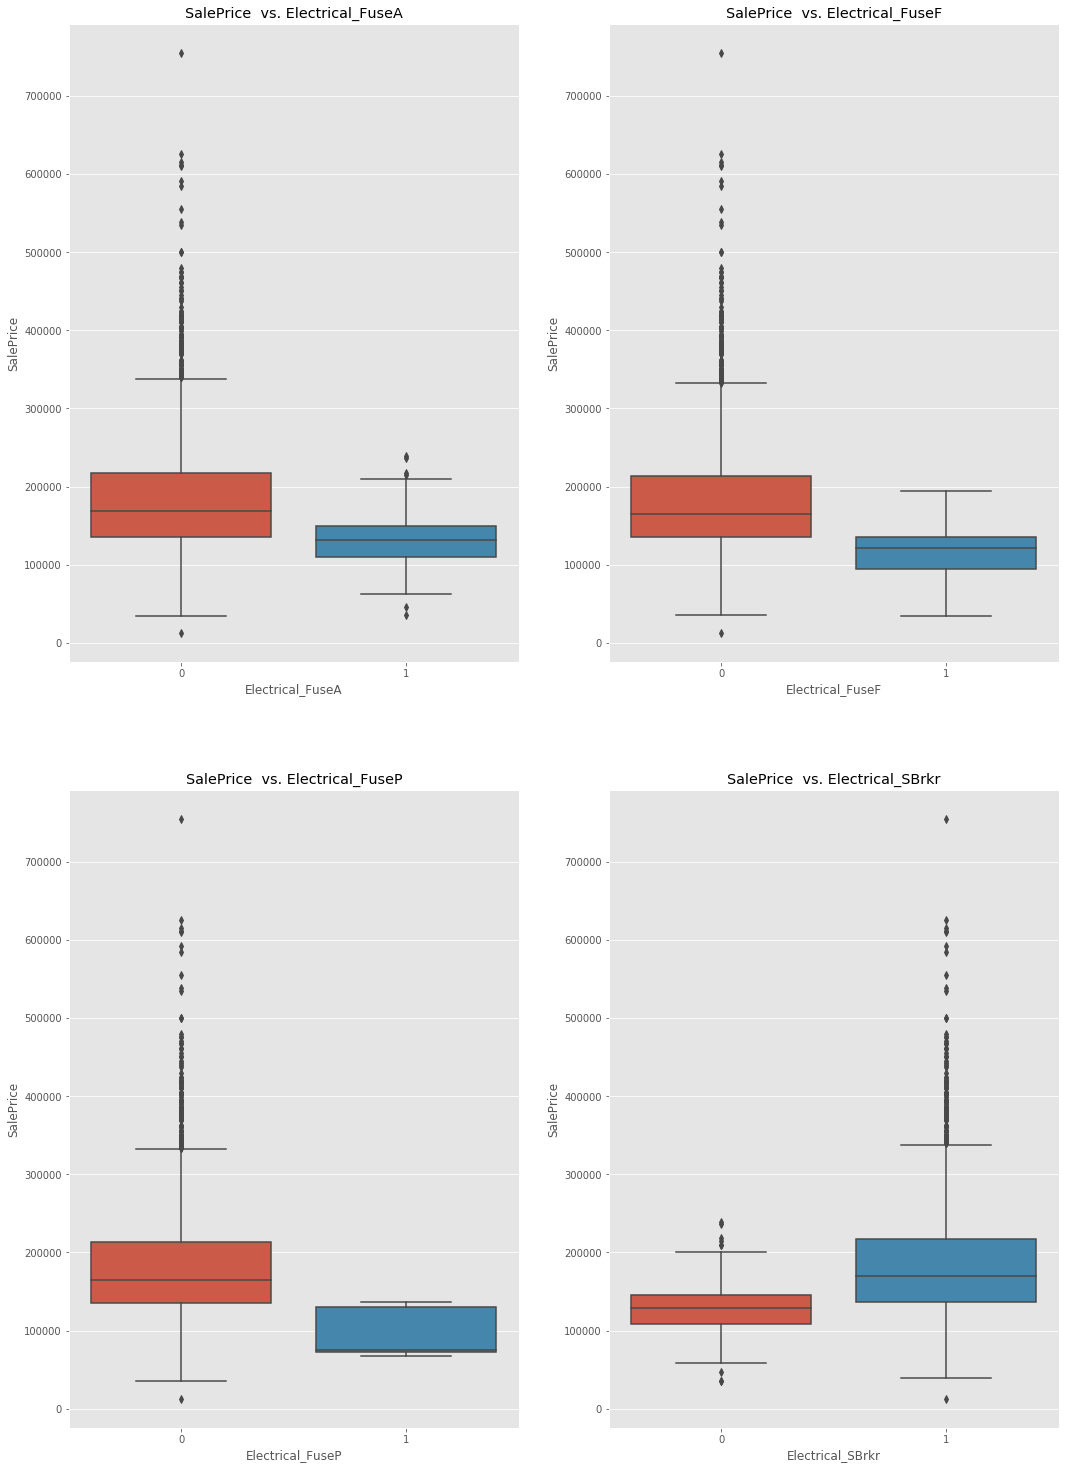

_____________________________________________________________________________________________________________________________
_____________________________________________________________________________________________________________________________
                                                   GarageType
_____________________________________________________________________________________________________________________________
_____________________________________________________________________________________________________________________________
0    2359
1      19
Name: GarageType_2Types, dtype: int64
1    1490
0     888
Name: GarageType_Attchd, dtype: int64
0    2351
1      27
Name: GarageType_Basment, dtype: int64
0    2230
1     148
Name: GarageType_BuiltIn, dtype: int64
0    2372
1       6
Name: GarageType_CarPort, dtype: int64
0    1690
1     688
Name: GarageType_Detchd, dtype: int64


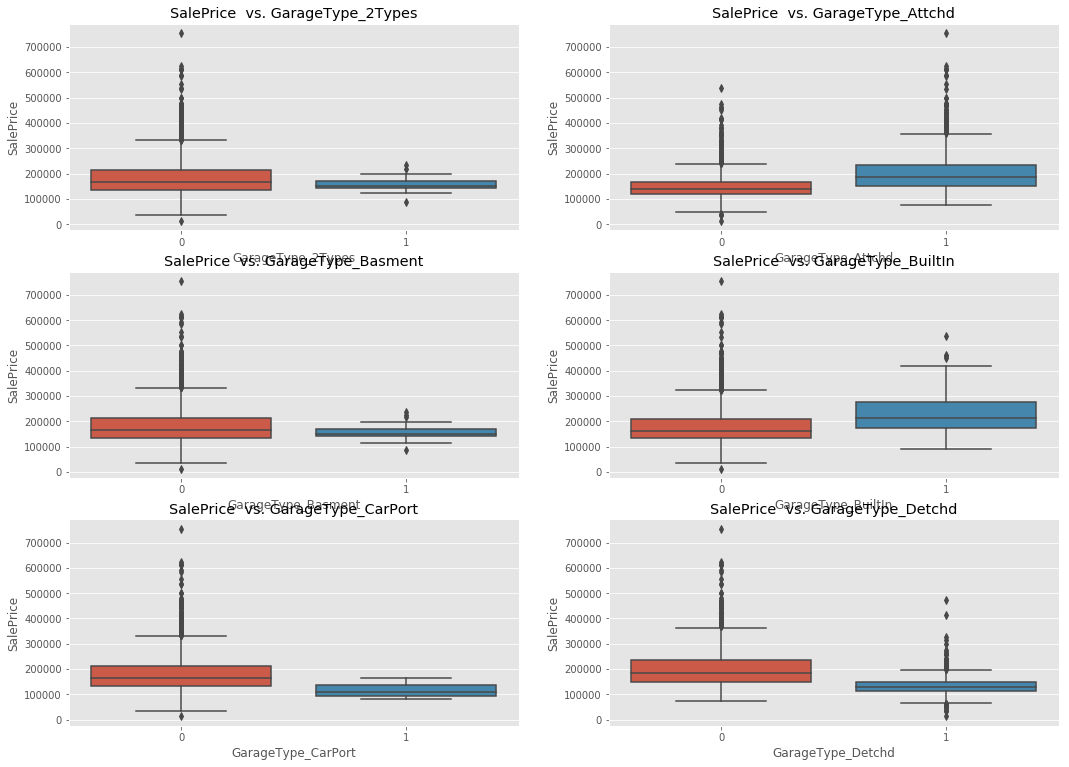

_____________________________________________________________________________________________________________________________
_____________________________________________________________________________________________________________________________
                                                   PavedDrive
_____________________________________________________________________________________________________________________________
_____________________________________________________________________________________________________________________________
0    2259
1     119
Name: PavedDrive_N, dtype: int64
0    2324
1      54
Name: PavedDrive_P, dtype: int64
1    2205
0     173
Name: PavedDrive_Y, dtype: int64


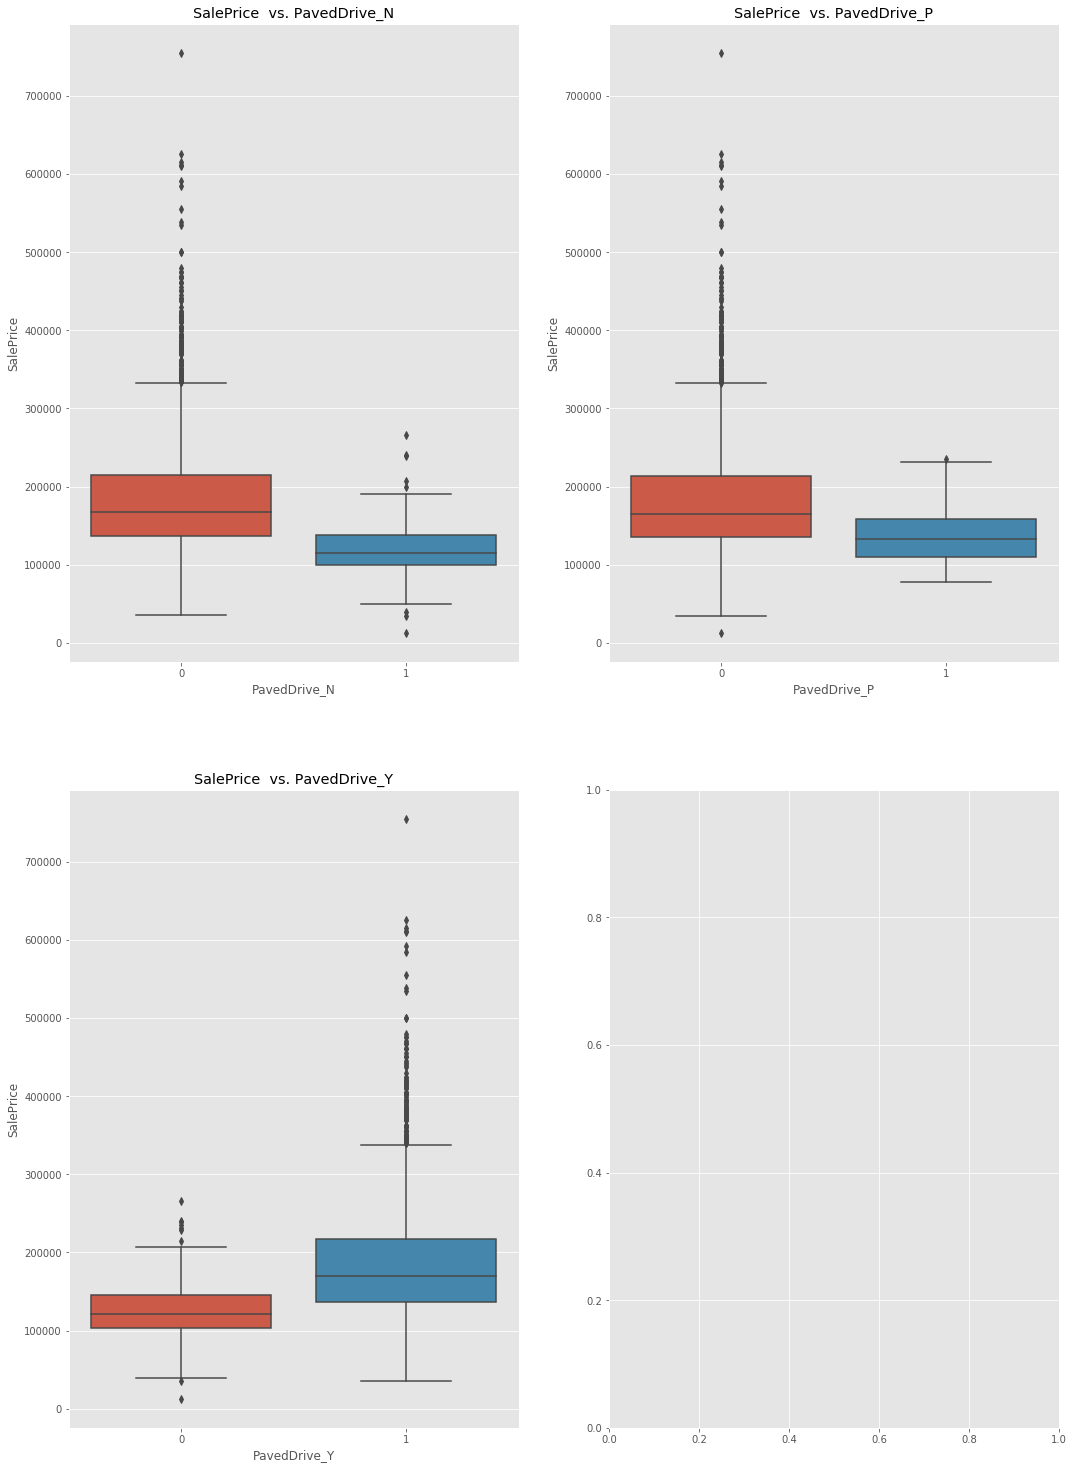

IndexError: list index out of range

In [1868]:
for cat,dimension in enumerate(fig_sizes):
    box_maykr(dumb_data,dummy_cats[cat],'SalePrice',dimension)

# Making 'other' columns for selec dummy categories

In [1869]:
def make_other_col(df,new_col_name,col_index,list_of_cols_to_group):
    """
    takes a list of columns to group into an other category in a dataframe
    
    df:  dataframe to manipulate
    new_col_name: string, what we want to call the grouped col name
    col_index: int, what column index we want to insert our new column
    list_of_cols_to_group = list of columns in the df that we want to group, these columns are assumed to contain 
                            binary values (0,1)
    
    """
    
    df.loc[:,new_col_name] = [0]*len(df)
    
    temp_column = df.pop(new_col_name)
    df.insert(col_index, new_col_name, temp_column)
    
    df.loc[:,new_col_name] = list(df[list_of_cols_to_group].sum(axis = 1))


    df = df.drop(list_of_cols_to_group,axis = 1)


    return df

In [1870]:
cats_to_drop = []
for cat_list in dummy_cats:
    for cat in cat_list:
        if dumb_data[cat].value_counts()[1] <=40:
            cats_to_drop.append(cat)

            
list(enumerate(cats_to_drop))  
cats_to_drop

['MSSubClass_1-1/2 STORY - UNFINISHED ALL AGES',
 'MSSubClass_1-1/2 STORY PUD - ALL AGES',
 'MSSubClass_1-STORY W/FINISHED ATTIC ALL AGES',
 'MSSubClass_2 FAMILY CONVERSION - ALL STYLES AND AGES',
 'MSSubClass_2-1/2 STORY ALL AGES',
 'MSSubClass_PUD - MULTILEVEL - INCL SPLIT LEV/FOYER',
 'MSSubClass_SPLIT FOYER',
 'MSZoning_C (all)',
 'MSZoning_I (all)',
 'MSZoning_RH',
 'Utilities_NoSewr',
 'LotConfig_FR3',
 'Neighborhood_Blmngtn',
 'Neighborhood_Blueste',
 'Neighborhood_BrDale',
 'Neighborhood_ClearCr',
 'Neighborhood_Greens',
 'Neighborhood_GrnHill',
 'Neighborhood_Landmrk',
 'Neighborhood_MeadowV',
 'Neighborhood_NPkVill',
 'Neighborhood_SWISU',
 'Neighborhood_Veenker',
 'Condition1_PosA',
 'Condition1_PosN',
 'Condition1_RRAe',
 'Condition1_RRAn',
 'Condition1_RRNe',
 'Condition1_RRNn',
 'Condition2_Artery',
 'Condition2_Feedr',
 'Condition2_PosA',
 'Condition2_PosN',
 'Condition2_RRAe',
 'Condition2_RRAn',
 'Condition2_RRNn',
 'BldgType_2fmCon',
 'HouseStyle_1.5Unf',
 'HouseStyle

In [1892]:
dumb_data = pd.get_dummies(data.drop(['Street','SaleType','SaleCondition'],axis = 1))
dumb_data = pd.merge(dumb_data,data[['MapRefNo','Neighborhood']],on = 'MapRefNo') #getting the original Neighborhood Column Back
second_column = dumb_data.pop('Neighborhood')
dumb_data.insert(1, 'Neighborhood', second_column) # changing position of Neighborhood column


ls = ['MSSubClass_1-1/2 STORY - UNFINISHED ALL AGES','MSSubClass_1-1/2 STORY PUD - ALL AGES',
      'MSSubClass_1-STORY W/FINISHED ATTIC ALL AGES','MSSubClass_2 FAMILY CONVERSION - ALL STYLES AND AGES',
      'MSSubClass_2-1/2 STORY ALL AGES','MSSubClass_PUD - MULTILEVEL - INCL SPLIT LEV/FOYER',
      'MSSubClass_SPLIT FOYER']

dumb_data = make_other_col(dumb_data,'MSSubClass_other',53,ls)
print(sum(list(dumb_data.loc[:,'MSSubClass_other':'MSSubClass_SPLIT OR MULTI-LEVEL'].sum())),len(dumb_data))
#dumb_data.head()



ls = ['MSZoning_C (all)','MSZoning_I (all)','MSZoning_RH']

dumb_data = make_other_col(dumb_data,'MSZoning_other',63,ls)
print(sum(dumb_data.loc[:,'MSZoning_other':'MSZoning_RM'].sum()),len(dumb_data))
#dumb_data.head()


ls = ['LotConfig_Corner','LotConfig_FR3']

dumb_data = make_other_col(dumb_data,'LotConfig_other',73,ls)
print(sum(dumb_data.loc[:,'LotConfig_other':'LotConfig_Inside'].sum()),len(dumb_data))
#dumb_data.head()



ls = ['Condition1_PosA','Condition1_PosN','Condition1_RRAe','Condition1_RRAn','Condition1_RRNe','Condition1_RRNn']

dumb_data = make_other_col(dumb_data,'Condition1_other',105,ls)
print(sum(dumb_data.loc[:,'Condition1_other':'Condition1_Norm'].sum()),len(dumb_data))
#dumb_data.head()


ls = ['Condition2_Artery',
 'Condition2_Feedr',
 'Condition2_PosA',
 'Condition2_PosN',
 'Condition2_RRAe',
 'Condition2_RRAn',
 'Condition2_RRNn']

dumb_data = make_other_col(dumb_data,'Condition2_other',109,ls)
print(sum(dumb_data.loc[:,'Condition2_other':'Condition2_Norm'].sum()),len(dumb_data))
#dumb_data.head()



ls = ['HouseStyle_1.5Unf','HouseStyle_2.5Fin']

dumb_data = make_other_col(dumb_data,'HouseStyle_other',116,ls)
print(sum(dumb_data.loc[:,'HouseStyle_other':'HouseStyle_SLvl'].sum()),len(dumb_data))
#dumb_data.head()


ls = ['RoofStyle_Shed','RoofStyle_Mansard','RoofStyle_Gambrel','RoofStyle_Flat']

dumb_data = make_other_col(dumb_data,'RoofStyle_other',123,ls)
print(sum(dumb_data.loc[:,'RoofStyle_other':'RoofStyle_Hip'].sum()),len(dumb_data))
#dumb_data.head()

ls = ['RoofMatl_Membran','RoofMatl_Metal','RoofMatl_Roll','RoofMatl_Tar&Grv','RoofMatl_WdShake','RoofMatl_WdShngl']

dumb_data = make_other_col(dumb_data,'RoofMatl_other',126,ls)
print(sum(dumb_data.loc[:,'RoofMatl_other':'RoofMatl_CompShg'].sum()),len(dumb_data))
#dumb_data.head()


ls = ['Exterior1st_AsbShng', 'Exterior1st_BrkComm','Exterior1st_CBlock','Exterior1st_ImStucc','Exterior1st_Stucco']

dumb_data = make_other_col(dumb_data,'Exterior1st_other',128,ls)
print(sum(dumb_data.loc[:,'Exterior1st_other':'Exterior1st_WdShing'].sum()),len(dumb_data))
#dumb_data.head()


ls = ['Exterior2nd_AsbShng',
 'Exterior2nd_AsphShn',
 'Exterior2nd_Brk Cmn',
 'Exterior2nd_CBlock',
 'Exterior2nd_ImStucc',
 'Exterior2nd_Stone',
 'Exterior2nd_Stucco']

dumb_data = make_other_col(dumb_data,'Exterior2nd_other',137,ls)
print(sum(dumb_data.loc[:,'Exterior2nd_other':'Exterior2nd_Wd Shng'].sum()),len(dumb_data))
#dumb_data.head()



ls = ['MasVnrType_BrkCmn']

dumb_data = make_other_col(dumb_data,'MasVnrType_other',146,ls)
print(sum(dumb_data.loc[:,'MasVnrType_other':'MasVnrType_Stone'].sum()),len(dumb_data))
#dumb_data.head()



ls = ['Foundation_Stone',
 'Foundation_Wood']

dumb_data = make_other_col(dumb_data,'Foundation_other',150,ls)
print(sum(dumb_data.loc[:,'Foundation_other':'Foundation_PConc'].sum()),len(dumb_data))
#dumb_data.head()


ls = ['Heating_GasW',
 'Heating_Grav',
 'Heating_OthW']

dumb_data = make_other_col(dumb_data,'Heating_other',154,ls)
print(sum(dumb_data.loc[:,'Heating_other':'Heating_GasA'].sum()),len(dumb_data))
#dumb_data.head()

ls = ['Electrical_FuseF',
 'Electrical_FuseP']

dumb_data = make_other_col(dumb_data,'Electrical_other',156,ls)
print(sum(dumb_data.loc[:,'Electrical_other':'Electrical_SBrkr'].sum()),len(dumb_data))
#dumb_data.head()


ls = ['GarageType_2Types',
 'GarageType_Basment',
 'GarageType_CarPort']

dumb_data = make_other_col(dumb_data,'GarageType_other',159,ls)
print(sum(dumb_data.loc[:,'GarageType_other':'GarageType_Detchd'].sum()),len(dumb_data))

2378 2378
2378 2378
2378 2378
2378 2378
2378 2378
2378 2378
2378 2378
2378 2378
2378 2378
2378 2378
2378 2378
2378 2378
2378 2378
2378 2378
2378 2378


In [1893]:
dumb_data.head()

,MapRefNo,Neighborhood,GrLivArea,SalePrice,LotArea,LotShape,LandSlope,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,1stFlrSF,2ndFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,MSSubClass_other,MSSubClass_1-1/2 STORY FINISHED ALL AGES,MSSubClass_1-STORY 1945 & OLDER,MSSubClass_1-STORY 1946 & NEWER ALL STYLES,MSSubClass_1-STORY PUD (Planned Unit Development) - 1946 & NEWER,MSSubClass_2-STORY 1945 & OLDER,MSSubClass_2-STORY 1946 & NEWER,MSSubClass_2-STORY PUD - 1946 & NEWER,MSSubClass_DUPLEX - ALL STYLES AND AGES,MSSubClass_SPLIT OR MULTI-LEVEL,MSZoning_other,MSZoning_FV,MSZoning_RL,MSZoning_RM,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_AllPub,Utilities_NoSewr,LotConfig_other,LotConfig_CulDSac,LotConfig_FR2,LotConfig_Inside,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_Greens,Neighborhood_GrnHill,Neighborhood_IDOTRR,Neighborhood_Landmrk,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_other,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition2_other,Condition2_Norm,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_other,HouseStyle_1.5Fin,HouseStyle_1Story,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_other,RoofStyle_Gable,RoofStyle_Hip,RoofMatl_other,RoofMatl_CompShg,Exterior1st_other,Exterior1st_BrkFace,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_other,Exterior2nd_BrkFace,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_MetalSd,Exterior2nd_Plywood,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_other,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_other,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Heating_other,Heating_GasA,Electrical_other,Electrical_FuseA,Electrical_SBrkr,GarageType_other,GarageType_Attchd,GarageType_BuiltIn,GarageType_Detchd,PavedDrive_N,PavedDrive_P,PavedDrive_Y
0,909176150,SWISU,856,126000,7890,0,1,6,6,1939,1950,0.0,3,3,3,3,1,3,238.0,1,0.0,618.0,856.0,3,1,856,0,0,1.0,0.0,1,0,2,1,3,4,8,1,1939.0,1,2.0,399.0,3,3,0,0,0,0,166,0,0,3,2010,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1
1,905476230,Edwards,1049,139500,4235,0,1,5,5,1984,1984,149.0,4,3,4,3,2,6,552.0,5,393.0,104.0,1049.0,3,1,1049,0,0,1.0,0.0,2,0,2,1,4,5,8,0,1984.0,3,1.0,266.0,3,3,0,105,0,0,0,0,0,2,2009,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,1
2,911128020,IDOTRR,1001,124900,6060,0,1,5,9,1930,2007,0.0,4,3,3,3,1,5,737.0,1,0.0,100.0,837.0,5,1,1001,0,0,0.0,0.0,1,0,2,1,4,5,8,0,1930.0,1,1.0,216.0,3,1,154,0,42,86,0,0,0,11,2007,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0

# Lasso for Feature Selection on Dummified Set

In [1894]:
from sklearn.linear_model import Lasso,Ridge,LassoLarsIC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

In [1964]:
tr = dumb_data.copy()

train_features = tr.drop(['MapRefNo','SalePrice','Neighborhood','MoSold','YrSold'], axis = 1)
train_target = tr['SalePrice']


scaler = StandardScaler()
scaler.fit(train_features)
train_features_scaled = scaler.transform(train_features)


lasso = Lasso()

alpha_range = np.linspace(0,1000,1000)
lasso.set_params(normalize=True)
coefs_lasso  = []
scores = []

for alpha in alpha_range:
        lasso.set_params(alpha=alpha)
        lasso.fit(train_features_scaled,train_target)  
        coefs_lasso.append(lasso.coef_)
        scores.append(lasso.score(train_features_scaled,train_target))

coefs_lasso = pd.DataFrame(coefs_lasso, index = alpha_range, columns = train_features.columns)  
score_lasso = score_lasso.reset_index()
score_lasso = pd.DataFrame({'lambda':alpha_range,'R^2':scores})

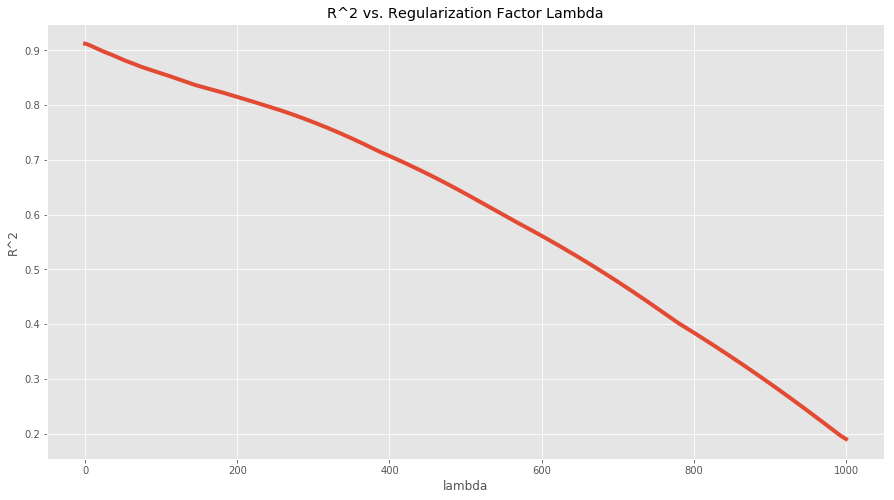

In [1965]:
fig,ax = plt.subplots()
fig.set_size_inches(15,8)
sns.lineplot(data = score_lasso.reset_index(), x= 'lambda',y = 'R^2',linewidth = 4)
plt.title('R^2 vs. Regularization Factor Lambda')
plt.show()

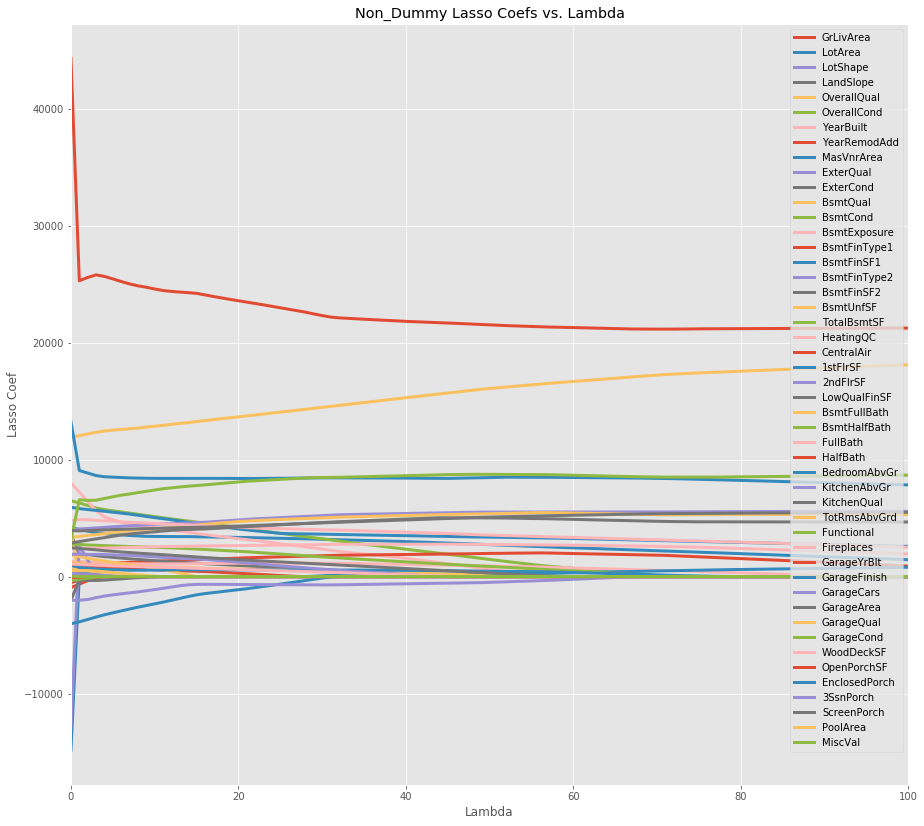

In [1967]:
Non_dummies = list(coefs_lasso.columns)[list(coefs_lasso.columns).index( 'GrLivArea'):\
                                                list(coefs_lasso.columns).index( 'MiscVal' )+1]

fig,ax = plt.subplots()
fig.set_size_inches(15,14)

for i in range(len(Non_dummies)):
    sns.lineplot(x = coefs_lasso.index,y = Non_dummies[i],
                 data = coefs_lasso,label = Non_dummies[i],linewidth = 3)

plt.xlim(0,100)
plt.title("Non_Dummy Lasso Coefs vs. Lambda")
plt.ylabel("Lasso Coef")
plt.xlabel("Lambda")
plt.legend(loc = 1)
plt.show()

# Visualizing coeficients of dummy subgroups vs. normalization factor lambda

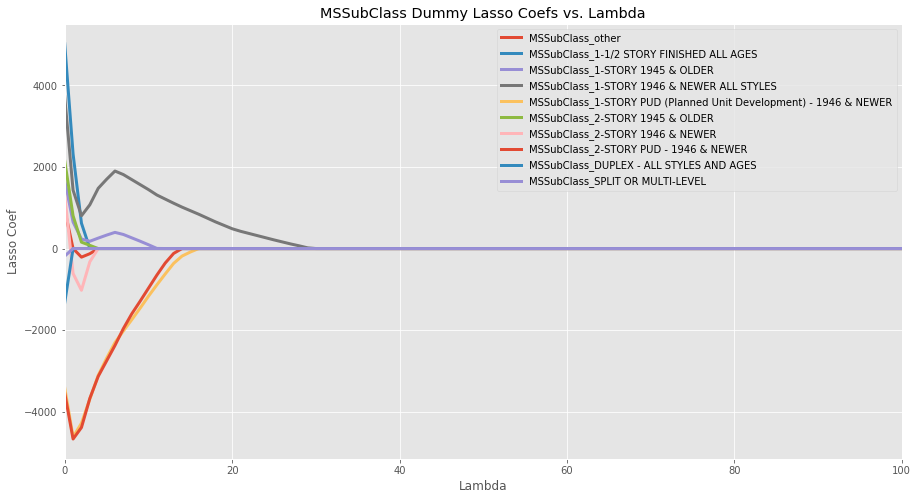

In [1918]:
MSSubClass_dummies = list(coefs_lasso.columns)[list(coefs_lasso.columns).index('MSSubClass_other'):\
                                                list(coefs_lasso.columns).index('MSSubClass_SPLIT OR MULTI-LEVEL')+1]

fig,ax = plt.subplots()
fig.set_size_inches(15,8)

for i in range(len(MSSubClass_dummies)):
    sns.lineplot(x = coefs_lasso.index,y = MSSubClass_dummies[i],data = coefs_lasso,label = MSSubClass_dummies[i],linewidth = 3)

plt.xlim(0,100)
plt.title("MSSubClass Dummy Lasso Coefs vs. Lambda")
plt.ylabel("Lasso Coef")
plt.xlabel("Lambda")
plt.legend(loc = 1)
plt.show()

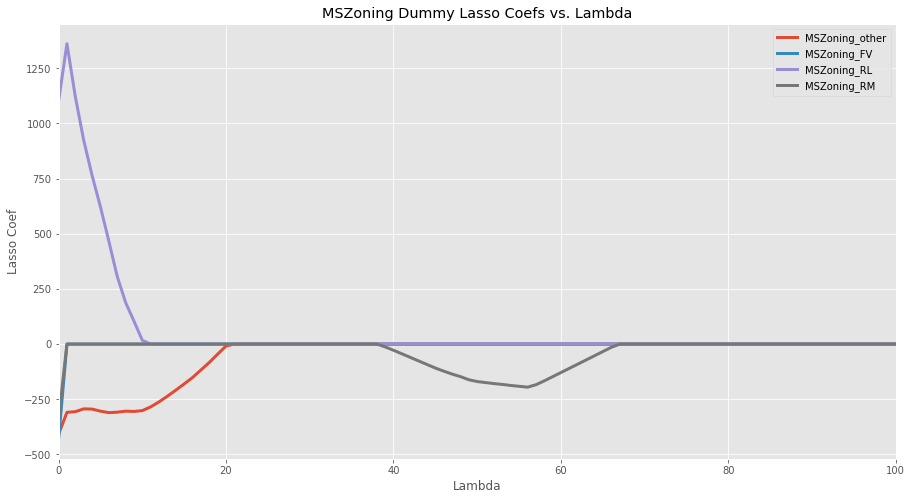

In [1919]:
MSZoning_dummies = list(coefs_lasso.columns)[list(coefs_lasso.columns).index('MSZoning_other'):\
                                                list(coefs_lasso.columns).index('MSZoning_RM')+1]

fig,ax = plt.subplots()
fig.set_size_inches(15,8)

for i in range(len(MSZoning_dummies)):
    sns.lineplot(x = coefs_lasso.index,y = MSZoning_dummies[i],data = coefs_lasso,label = MSZoning_dummies[i],linewidth = 3)

plt.xlim(0,100)
plt.title("MSZoning Dummy Lasso Coefs vs. Lambda")
plt.ylabel("Lasso Coef")
plt.xlabel("Lambda")
plt.legend(loc = 1)
plt.show()

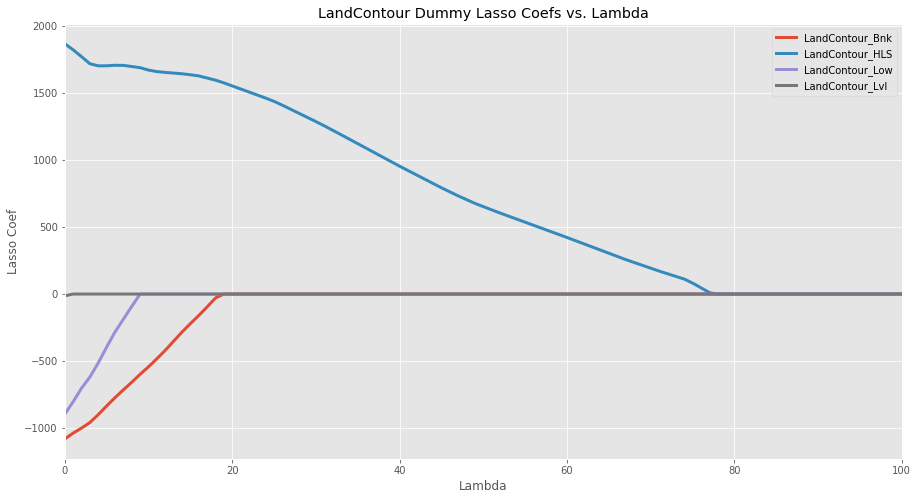

In [1938]:
LandContour_dummies = list(coefs_lasso.columns)[list(coefs_lasso.columns).index('LandContour_Bnk'):\
                                                list(coefs_lasso.columns).index('LandContour_Lvl')+1]

fig,ax = plt.subplots()
fig.set_size_inches(15,8)

for i in range(len(LandContour_dummies)):
    sns.lineplot(x = coefs_lasso.index,y = LandContour_dummies[i],data = coefs_lasso,label = LandContour_dummies[i],linewidth = 3)

plt.xlim(0,100)
plt.title("LandContour Dummy Lasso Coefs vs. Lambda")
plt.ylabel("Lasso Coef")
plt.xlabel("Lambda")
plt.legend(loc = 1)
plt.show()

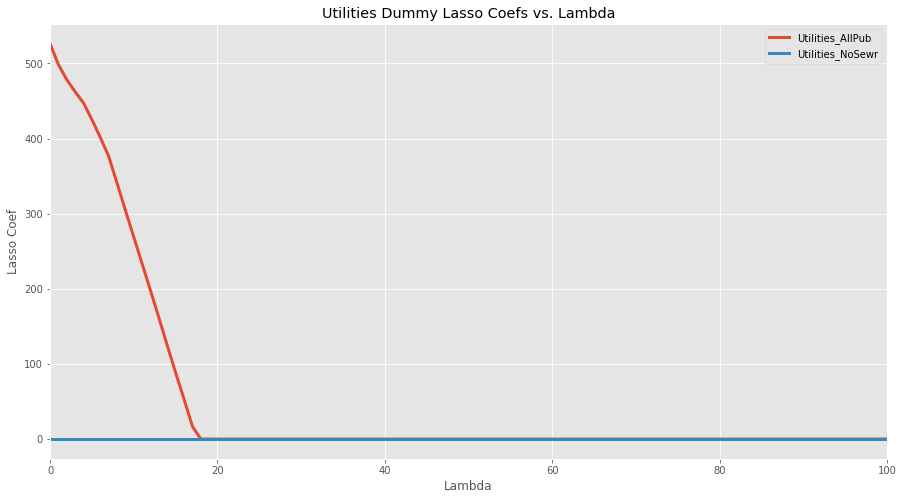

In [1941]:
Utilities_dummies = list(coefs_lasso.columns)[list(coefs_lasso.columns).index('Utilities_AllPub'):\
                                             list(coefs_lasso.columns).index('Utilities_NoSewr')+1]

fig,ax = plt.subplots()
fig.set_size_inches(15,8)

for i in range(len(Utilities_dummies)):
    sns.lineplot(x = coefs_lasso.index,y = Utilities_dummies[i],data = coefs_lasso,label =  Utilities_dummies[i],linewidth = 3)

plt.xlim(0,100)
plt.title("Utilities Dummy Lasso Coefs vs. Lambda")
plt.ylabel("Lasso Coef")
plt.xlabel("Lambda")
plt.legend()
plt.show()

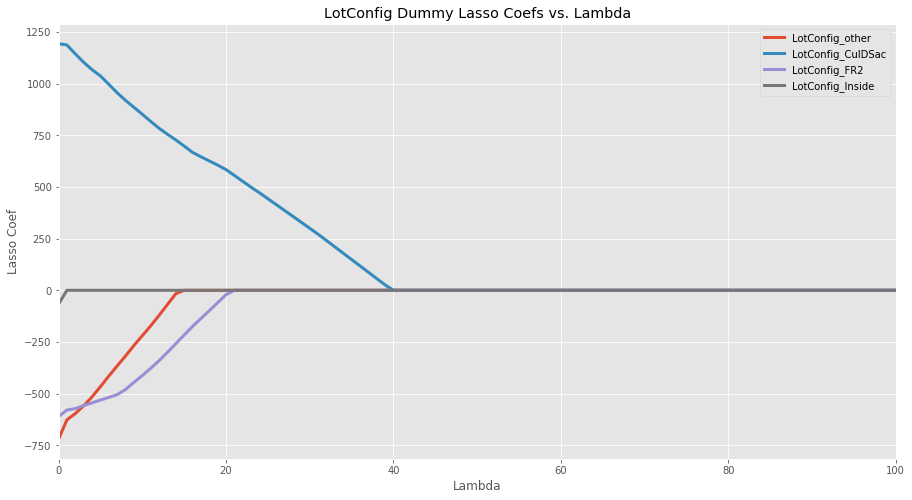

In [1942]:
LotConfig_dummies = list(coefs_lasso.columns)[list(coefs_lasso.columns).index('LotConfig_other'):\
                                             list(coefs_lasso.columns).index('LotConfig_Inside')+1]

fig,ax = plt.subplots()
fig.set_size_inches(15,8)

for i in range(len(LotConfig_dummies)):
    sns.lineplot(x = coefs_lasso.index,y = LotConfig_dummies[i],data = coefs_lasso,label =  LotConfig_dummies[i],linewidth = 3)

plt.xlim(0,100)
plt.title("LotConfig Dummy Lasso Coefs vs. Lambda")
plt.ylabel("Lasso Coef")
plt.xlabel("Lambda")
plt.legend()
plt.show()

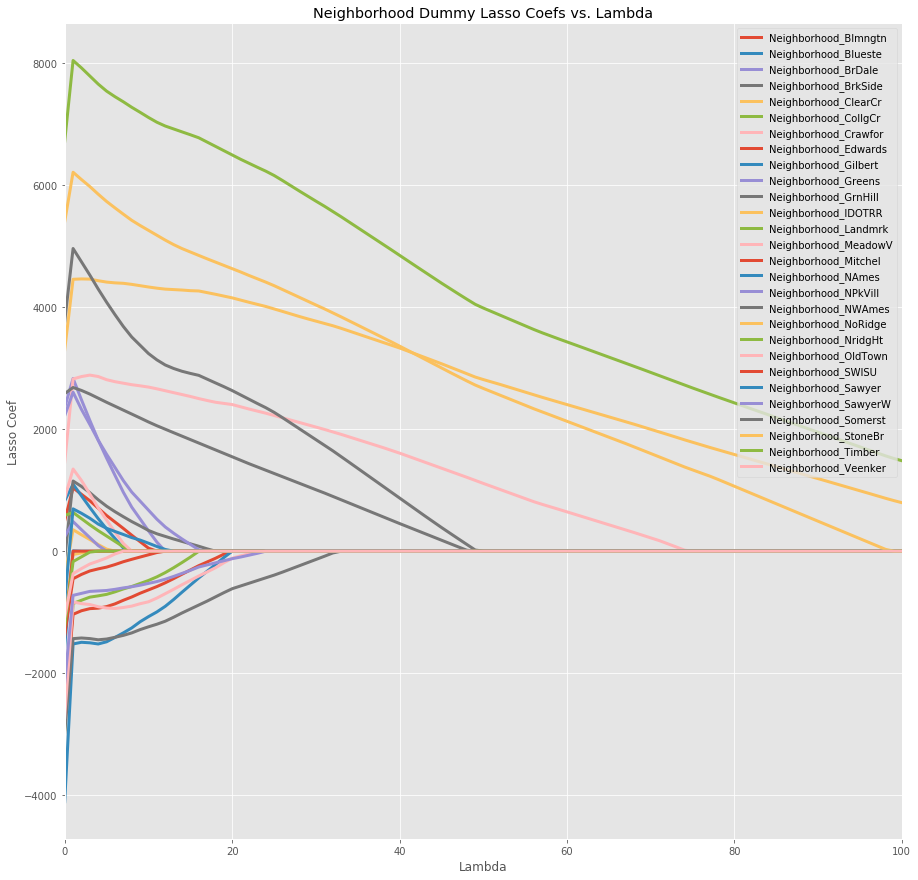

In [1943]:
Neighborhood_dummies = list(coefs_lasso.columns)[list(coefs_lasso.columns).index('Neighborhood_Blmngtn'):\
                                                list(coefs_lasso.columns).index('Neighborhood_Veenker')+1]

fig,ax = plt.subplots()
fig.set_size_inches(15,15)

for i in range(len(Neighborhood_dummies)):
    sns.lineplot(x = coefs_lasso.index,y = Neighborhood_dummies[i],data = coefs_lasso,label = Neighborhood_dummies[i],linewidth = 3)

plt.xlim(0,100)
plt.title("Neighborhood Dummy Lasso Coefs vs. Lambda")
plt.ylabel("Lasso Coef")
plt.xlabel("Lambda")
plt.legend()
plt.show()

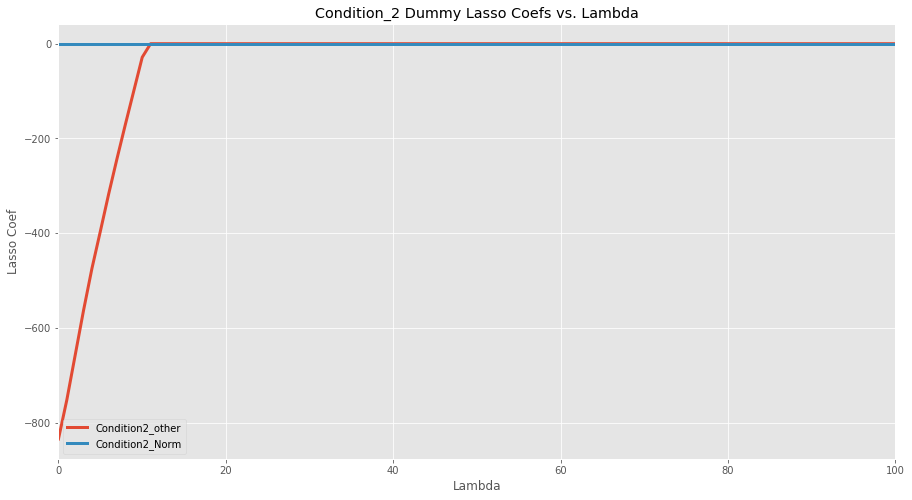

In [1945]:
Condition_2_dummies = list(coefs_lasso.columns)[list(coefs_lasso.columns).index( 'Condition2_other'):\
                                                list(coefs_lasso.columns).index( 'Condition2_Norm' )+1]

fig,ax = plt.subplots()
fig.set_size_inches(15,8)

for i in range(len(Condition_2_dummies)):
    sns.lineplot(x = coefs_lasso.index,y = Condition_2_dummies[i],
                 data = coefs_lasso,label = Condition_2_dummies[i],linewidth = 3)

plt.xlim(0,100)
plt.title("Condition_2 Dummy Lasso Coefs vs. Lambda")
plt.ylabel("Lasso Coef")
plt.xlabel("Lambda")
plt.legend()
plt.show()

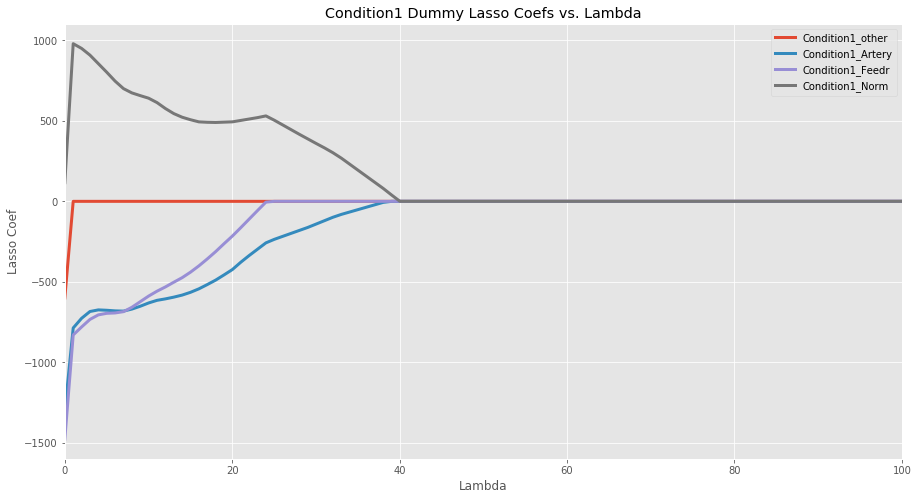

In [1947]:
Condition1_dummies = list(coefs_lasso.columns)[list(coefs_lasso.columns).index( 'Condition1_other'):\
                                                list(coefs_lasso.columns).index( 'Condition1_Norm' )+1]

fig,ax = plt.subplots()
fig.set_size_inches(15,8)

for i in range(len(Condition1_dummies)):
    sns.lineplot(x = coefs_lasso.index,y = Condition1_dummies[i],
                 data = coefs_lasso,label = Condition1_dummies[i],linewidth = 3)

plt.xlim(0,100)
plt.title("Condition1 Dummy Lasso Coefs vs. Lambda")
plt.ylabel("Lasso Coef")
plt.xlabel("Lambda")
plt.legend()
plt.show()

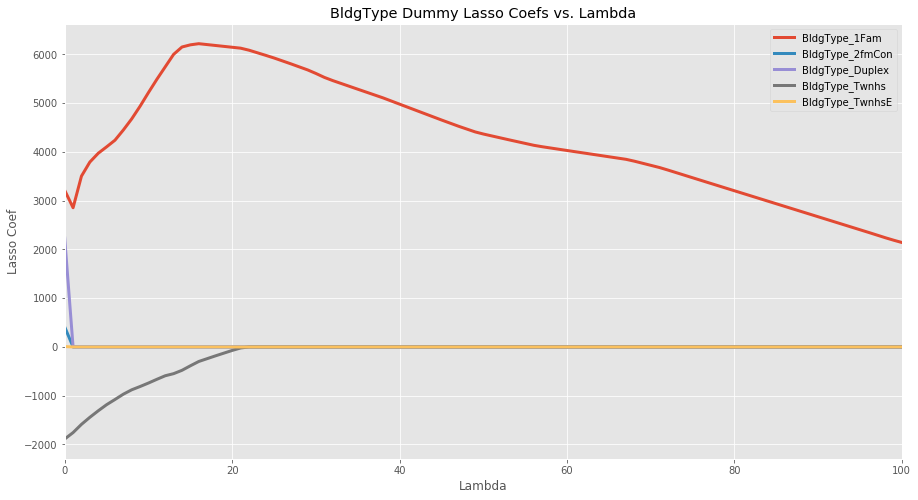

In [1948]:
BldgType_dummies = list(coefs_lasso.columns)[list(coefs_lasso.columns).index( 'BldgType_1Fam'):\
                                                list(coefs_lasso.columns).index( 'BldgType_TwnhsE' )+1]

fig,ax = plt.subplots()
fig.set_size_inches(15,8)

for i in range(len(BldgType_dummies)):
    sns.lineplot(x = coefs_lasso.index,y = BldgType_dummies[i],
                 data = coefs_lasso,label = BldgType_dummies[i],linewidth = 3)

plt.xlim(0,100)
plt.title("BldgType Dummy Lasso Coefs vs. Lambda")
plt.ylabel("Lasso Coef")
plt.xlabel("Lambda")
plt.legend()
plt.show()

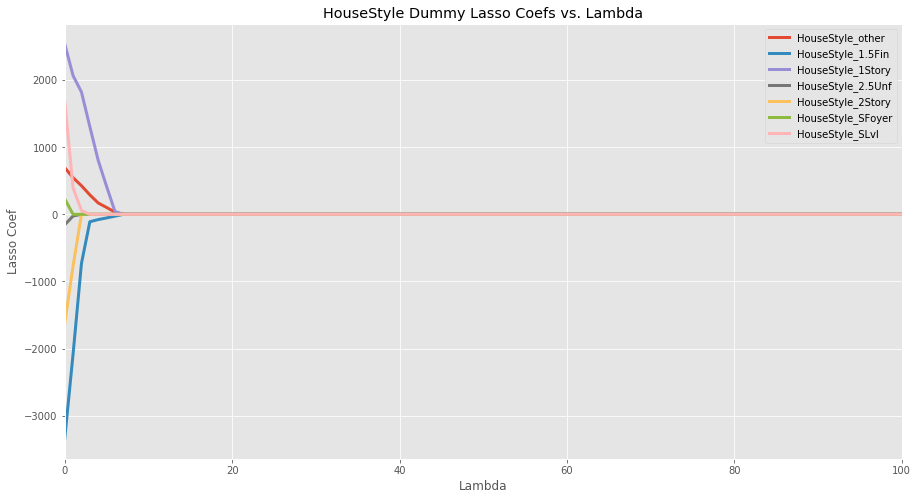

In [1949]:
HouseStyle_dummies = list(coefs_lasso.columns)[list(coefs_lasso.columns).index( 'HouseStyle_other'):\
                                                list(coefs_lasso.columns).index( 'HouseStyle_SLvl' )+1]

fig,ax = plt.subplots()
fig.set_size_inches(15,8)

for i in range(len(HouseStyle_dummies)):
    sns.lineplot(x = coefs_lasso.index,y = HouseStyle_dummies[i],
                 data = coefs_lasso,label = HouseStyle_dummies[i],linewidth = 3)

plt.xlim(0,100)
plt.title("HouseStyle Dummy Lasso Coefs vs. Lambda")
plt.ylabel("Lasso Coef")
plt.xlabel("Lambda")
plt.legend()
plt.show()

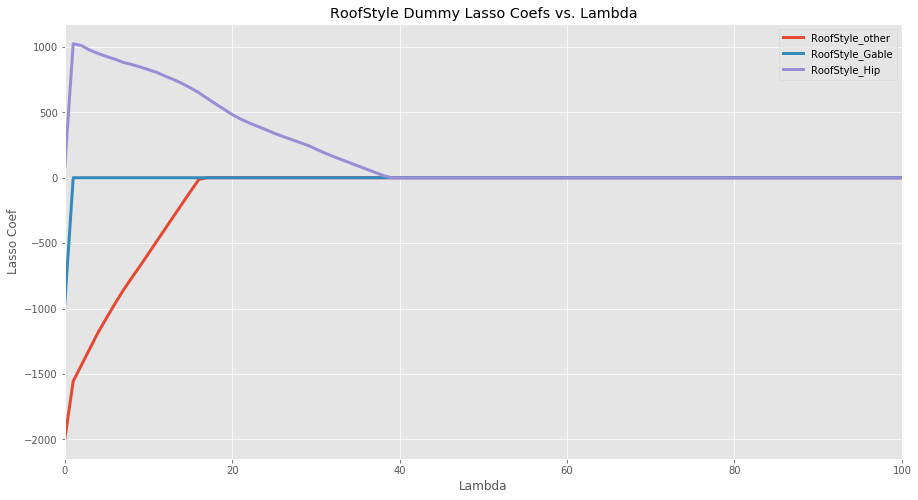

In [1950]:
RoofStyle_dummies = list(coefs_lasso.columns)[list(coefs_lasso.columns).index( 'RoofStyle_other'):\
                                                list(coefs_lasso.columns).index( 'RoofStyle_Hip' )+1]

fig,ax = plt.subplots()
fig.set_size_inches(15,8)

for i in range(len(RoofStyle_dummies)):
    sns.lineplot(x = coefs_lasso.index,y = RoofStyle_dummies[i],
                 data = coefs_lasso,label = RoofStyle_dummies[i],linewidth = 3)

plt.xlim(0,100)
plt.title("RoofStyle Dummy Lasso Coefs vs. Lambda")
plt.ylabel("Lasso Coef")
plt.xlabel("Lambda")
plt.legend()
plt.show()

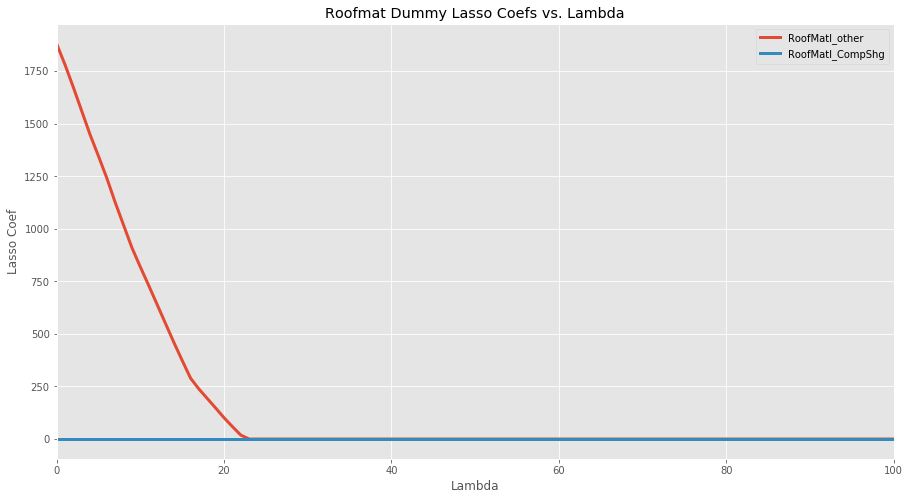

In [1951]:
Roofmat_dummies = list(coefs_lasso.columns)[list(coefs_lasso.columns).index('RoofMatl_other'):\
                                                list(coefs_lasso.columns).index('RoofMatl_CompShg')+1]

fig,ax = plt.subplots()
fig.set_size_inches(15,8)

for i in range(len(Roofmat_dummies)):
    sns.lineplot(x = coefs_lasso.index,y = Roofmat_dummies[i],data = coefs_lasso,label = Roofmat_dummies[i],linewidth = 3)

plt.xlim(0,100)
plt.title("Roofmat Dummy Lasso Coefs vs. Lambda")
plt.ylabel("Lasso Coef")
plt.xlabel("Lambda")
plt.legend()
plt.show()

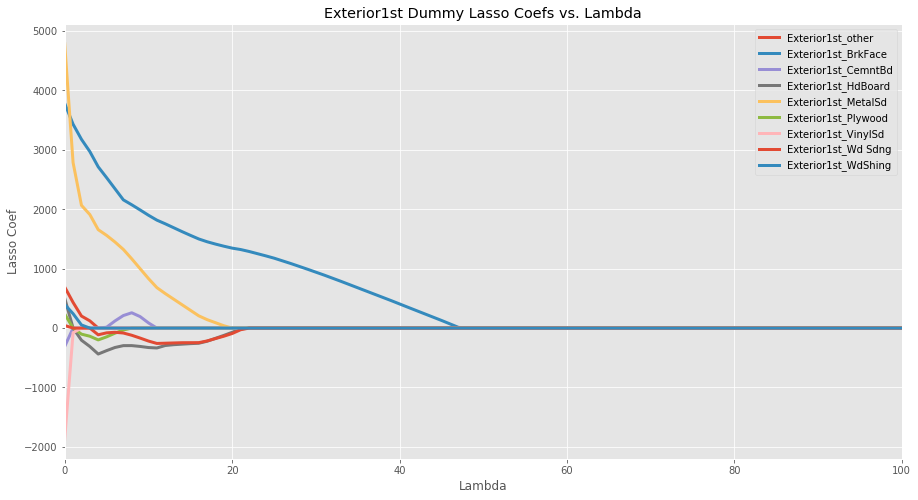

In [1952]:
Exterior1st_dummies = list(coefs_lasso.columns)[list(coefs_lasso.columns).index('Exterior1st_other' ):\
                                                list(coefs_lasso.columns).index( 'Exterior1st_WdShing' )+1]

fig,ax = plt.subplots()
fig.set_size_inches(15,8)

for i in range(len(Exterior1st_dummies)):
    sns.lineplot(x = coefs_lasso.index,y = Exterior1st_dummies[i],data = coefs_lasso,label = Exterior1st_dummies[i],linewidth = 3)

plt.xlim(0,100)
plt.title("Exterior1st Dummy Lasso Coefs vs. Lambda")
plt.ylabel("Lasso Coef")
plt.xlabel("Lambda")
plt.legend()
plt.show()

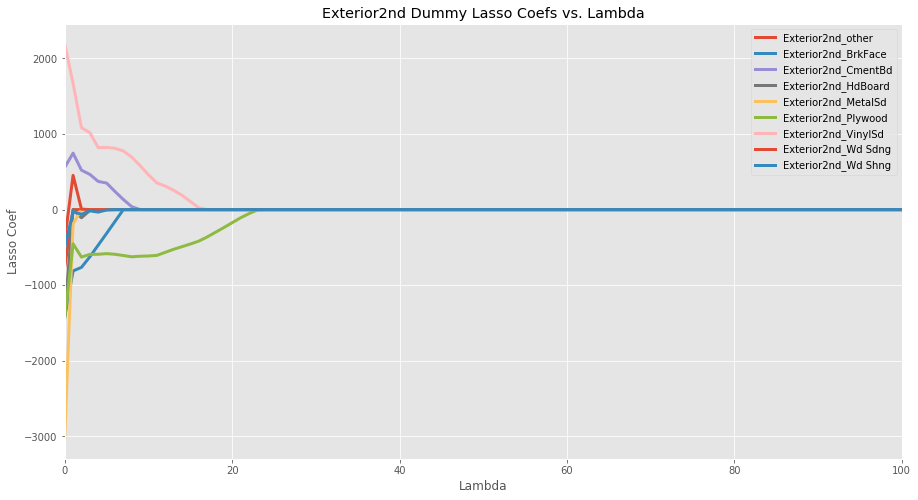

In [1954]:
Exterior2nd_dummies = list(coefs_lasso.columns)[list(coefs_lasso.columns).index('Exterior2nd_other' ):\
                                                list(coefs_lasso.columns).index( 'Exterior2nd_Wd Shng' )+1]

fig,ax = plt.subplots()
fig.set_size_inches(15,8)

for i in range(len(Exterior2nd_dummies)):
    sns.lineplot(x = coefs_lasso.index,y = Exterior2nd_dummies[i],data = coefs_lasso,label = Exterior2nd_dummies[i],linewidth = 3)

plt.xlim(0,100)
plt.title("Exterior2nd Dummy Lasso Coefs vs. Lambda")
plt.ylabel("Lasso Coef")
plt.xlabel("Lambda")
plt.legend()
plt.show()

In [1953]:
list(coefs_lasso.head().T.index)

['GrLivArea',
 'LotArea',
 'LotShape',
 'LandSlope',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'ExterQual',
 'ExterCond',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinSF1',
 'BsmtFinType2',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'HeatingQC',
 'CentralAir',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'KitchenQual',
 'TotRmsAbvGrd',
 'Functional',
 'Fireplaces',
 'GarageYrBlt',
 'GarageFinish',
 'GarageCars',
 'GarageArea',
 'GarageQual',
 'GarageCond',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'MSSubClass_other',
 'MSSubClass_1-1/2 STORY FINISHED ALL AGES',
 'MSSubClass_1-STORY 1945 & OLDER',
 'MSSubClass_1-STORY 1946 & NEWER ALL STYLES',
 'MSSubClass_1-STORY PUD (Planned Unit Development) - 1946 & NEWER',
 'MSSubClass_2-STORY 1945 & OLDER',
 '

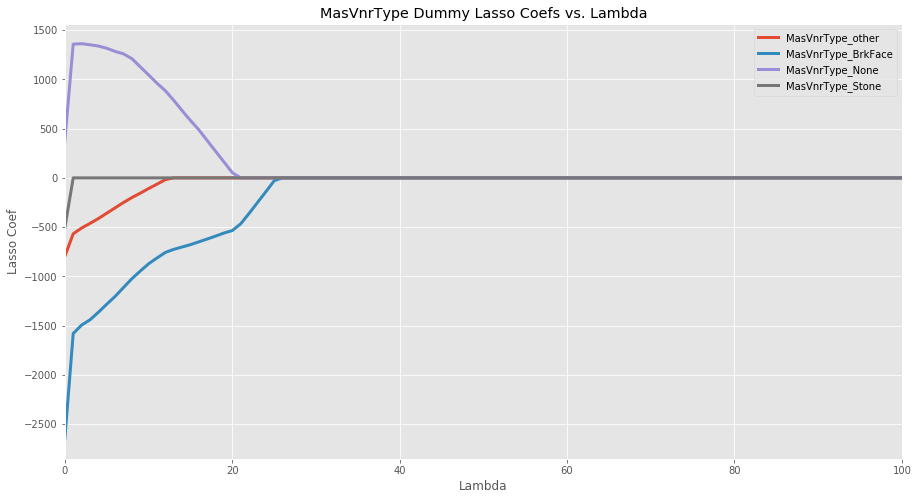

In [1956]:
MasVnrType_dummies = list(coefs_lasso.columns)[list(coefs_lasso.columns).index('MasVnrType_other'):\
                                                list(coefs_lasso.columns).index('MasVnrType_Stone')+1]

fig,ax = plt.subplots()
fig.set_size_inches(15,8)

for i in range(len(MasVnrType_dummies)):
    sns.lineplot(x = coefs_lasso.index,y = MasVnrType_dummies[i],data = coefs_lasso,label = MasVnrType_dummies[i],linewidth = 3)

plt.xlim(0,100)
plt.title("MasVnrType Dummy Lasso Coefs vs. Lambda")
plt.ylabel("Lasso Coef")
plt.xlabel("Lambda")
plt.legend()
plt.show()

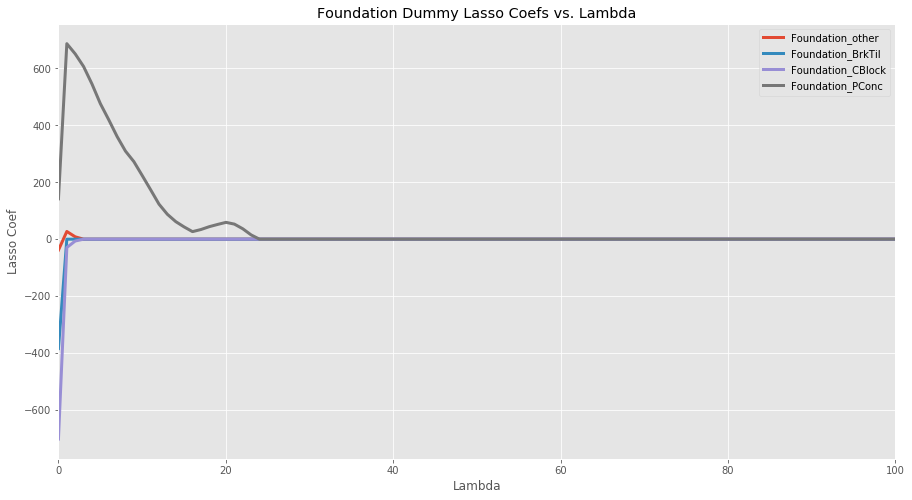

In [1955]:
Foundation_dummies = list(coefs_lasso.columns)[list(coefs_lasso.columns).index('Foundation_other'):\
                                                list(coefs_lasso.columns).index('Foundation_PConc')+1]

fig,ax = plt.subplots()
fig.set_size_inches(15,8)

for i in range(len(Foundation_dummies)):
    sns.lineplot(x = coefs_lasso.index,y = Foundation_dummies[i],data = coefs_lasso,label = Foundation_dummies[i],linewidth = 3)

plt.xlim(0,100)
plt.title("Foundation Dummy Lasso Coefs vs. Lambda")
plt.ylabel("Lasso Coef")
plt.xlabel("Lambda")
plt.legend()
plt.show()

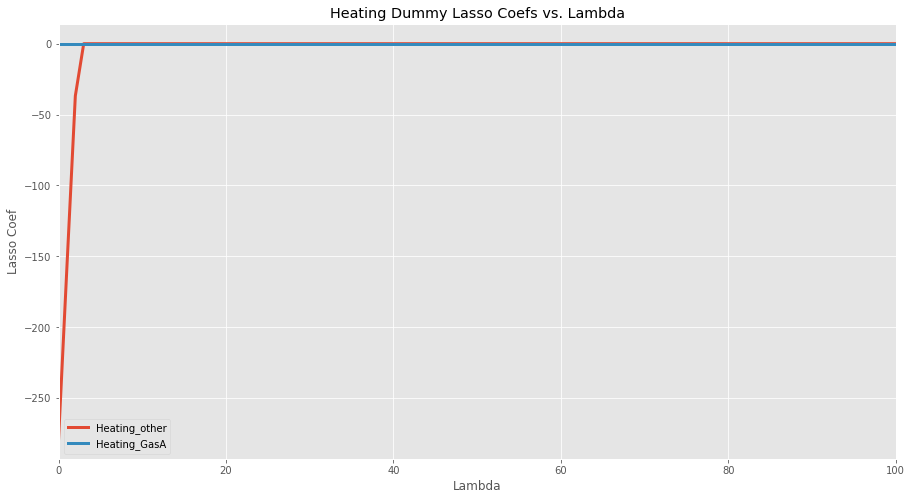

In [1957]:
Heating_dummies = list(coefs_lasso.columns)[list(coefs_lasso.columns).index('Heating_other'):\
                                                list(coefs_lasso.columns).index('Heating_GasA')+1]

fig,ax = plt.subplots()
fig.set_size_inches(15,8)

for i in range(len(Heating_dummies)):
    sns.lineplot(x = coefs_lasso.index,y = Heating_dummies[i],data = coefs_lasso,label = Heating_dummies[i],linewidth = 3)

plt.xlim(0,100)
plt.title("Heating Dummy Lasso Coefs vs. Lambda")
plt.ylabel("Lasso Coef")
plt.xlabel("Lambda")
plt.legend()
plt.show()

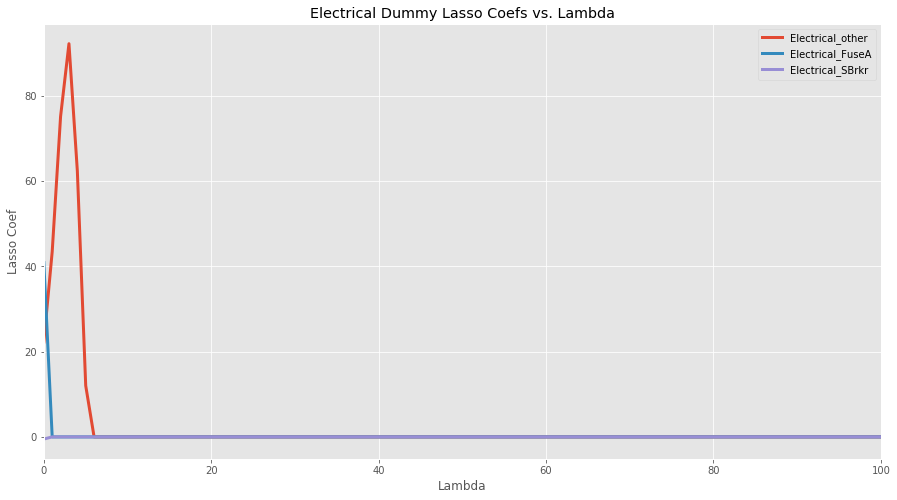

In [1959]:
Electrical_dummies = list(coefs_lasso.columns)[list(coefs_lasso.columns).index('Electrical_other'):\
                                                list(coefs_lasso.columns).index('Electrical_SBrkr')+1]

fig,ax = plt.subplots()
fig.set_size_inches(15,8)

for i in range(len(Electrical_dummies)):
    sns.lineplot(x = coefs_lasso.index,y = Electrical_dummies[i],data = coefs_lasso,label = Electrical_dummies[i],linewidth = 3)

plt.xlim(0,100)
plt.title("Electrical Dummy Lasso Coefs vs. Lambda")
plt.ylabel("Lasso Coef")
plt.xlabel("Lambda")
plt.legend()
plt.show()

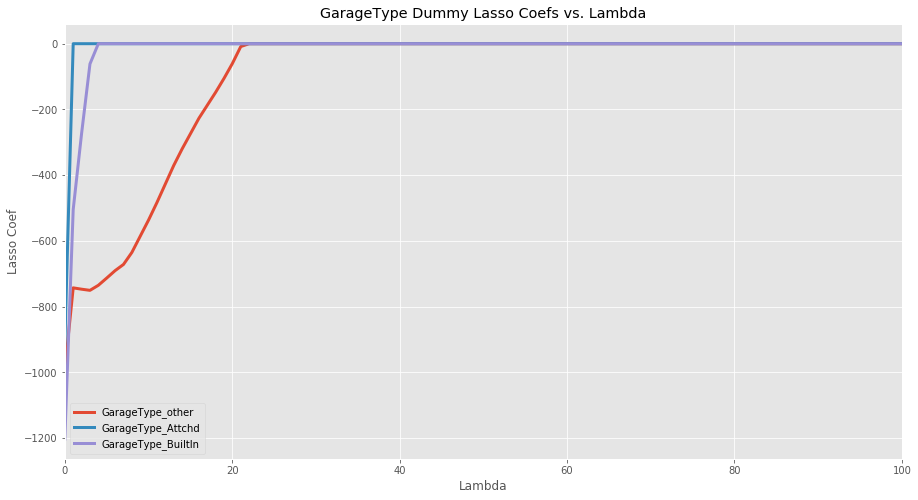

In [1960]:
GarageType_dummies = list(coefs_lasso.columns)[list(coefs_lasso.columns).index('GarageType_other'):\
                                              list(coefs_lasso.columns).index('GarageType_Detchd')]

fig,ax = plt.subplots()
fig.set_size_inches(15,8)

for i in range(len(GarageType_dummies)):
    sns.lineplot(x = coefs_lasso.index,y = GarageType_dummies[i],data = coefs_lasso,label =  GarageType_dummies[i],linewidth = 3)

plt.xlim(0,100)
plt.title("GarageType Dummy Lasso Coefs vs. Lambda")
plt.ylabel("Lasso Coef")
plt.xlabel("Lambda")
plt.legend()
plt.show()

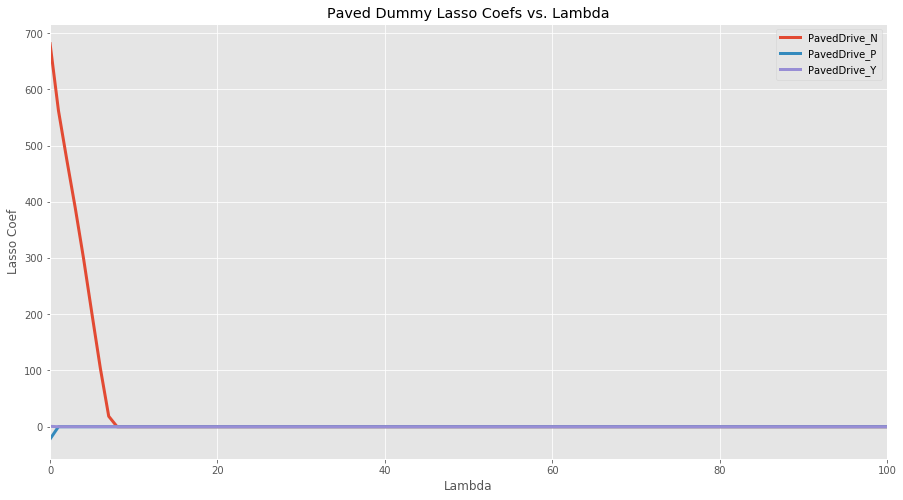

In [1936]:
Paved_dummies = list(coefs_lasso.columns)[list(coefs_lasso.columns).index('PavedDrive_N'):]

fig,ax = plt.subplots()
fig.set_size_inches(15,8)

for i in range(len(Paved_dummies)):
    sns.lineplot(x = coefs_lasso.index,y = Paved_dummies[i],data = coefs_lasso,label =  Paved_dummies[i],linewidth = 3)

plt.xlim(0,100)
plt.title("Paved Dummy Lasso Coefs vs. Lambda")
plt.ylabel("Lasso Coef")
plt.xlabel("Lambda")
plt.legend()
plt.show()